In [449]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from sklearn.datasets import make_blobs # type:ignore
from scipy.stats import multivariate_normal # type:ignore
from sklearn.metrics import confusion_matrix,classification_report # type:ignore
from scipy.optimize import linear_sum_assignment # type:ignore
from matplotlib.lines import Line2D # type:ignore
from sklearn.preprocessing import StandardScaler # type:ignore
from sklearn.decomposition import PCA # type:ignore
from sklearn.manifold import TSNE # type:ignore
import umap # type:ignore
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering # type:ignore
from sklearn.mixture import GaussianMixture # type:ignore
from sklearn.neighbors import NearestNeighbors # type:ignore
import kmedoids # type:ignore
from pyclustering.cluster.kmedoids import kmedoids # type:ignore
from pyclustering.utils import distance_metric,type_metric # type:ignore
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score # type:ignore 
import warnings # type:ignore
warnings.filterwarnings("ignore",category=UserWarning) # type:ignore
from main import CorrelatedClusterGenerator

# data

In [450]:
np.random.seed(42)

In [451]:
cluster_generator = CorrelatedClusterGenerator(n_samples=100000,n_features=20,n_clusters=3,correlation=0.8,random_state=42,cluster_std=[1.0, 5.5, 0.5])

In [452]:
X, y, centers = cluster_generator.generate_clusters()

In [453]:
X = X + np.random.normal(scale=3,size=X.shape) 

In [454]:
X = np.vstack(
    (X[y == 0][:5000], X[y == 1][:3500], X[y == 2][:1500])
)  

In [455]:
y = [0] * 5000 + [1] * 3500 + [2] * 1500

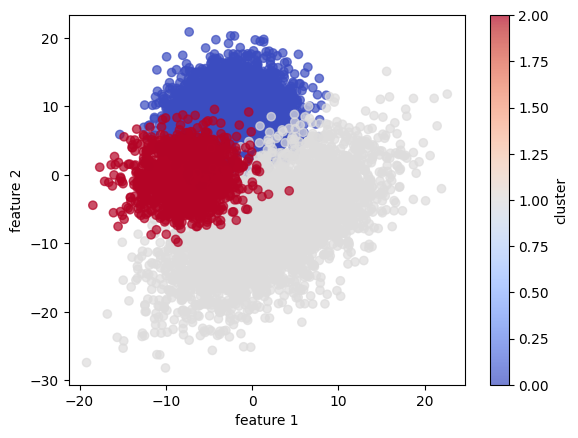

In [456]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

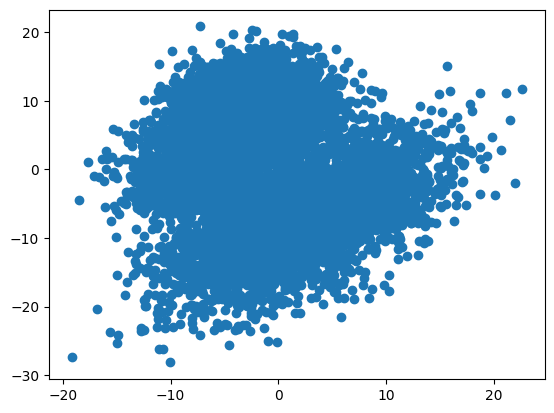

In [457]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [458]:
corr_dataset = pd.DataFrame(X) 

In [459]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [460]:
corr_dataset['target'] = y

In [461]:
corr_dataset

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_12     vab_13  \
0    -11.465204   5.599387  4.312371  1.480616  ...   6.554043  10.174477   
1    -11.158299  11.006670  7.445052 -2.340694  ...   4.905409   3.373192   
2    -12.409837   6.130500  1.658990  0.508636  ...   9.949368   0.902826   
3     -7.851833   7.562466  1.066909  1.931852  ...  10.462449   8.358172   
4    -12.629633   7.802215  1.641294  6.181642  ...   9.098878   2.426418   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...   2.027149  11.944160   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.838348   9.865637   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   4.241917   7.254749   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   5.820646   3.193405   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   3.487890   6.945253   

         vab_14    vab_15     vab_16     vab_17    vab_18     vab_19  \
0     -6.105382 -8.598853  -3.905392  -3.932896  0.909880  -2.713525   
1     -5.587315 -6.025893  -7.078251  -4.352729 -4.126285   2.608812   
2     -4.443581 -6.327451  -6.681295  -4.509145  1.470753   0.827407   
3     -8.215578 -7.137352  -6.076082  -4.456453  1.647711   3.676725   
4     -4.289523 -5.832111  -6.975442  -1.563299 -1.079437   3.909238   
...         ...       ...        ...        ...       ...        ...   
9995   2.384789  4.995102   9.154057 -11.648487 -4.730116  -9.753854   
9996  11.380138  0.367788  11.277025  -7.428380 -5.164451 -11.328021   
9997   4.476105  1.909178  12.341801  -5.159205 -8.570069  -6.478428   
9998   3.735165  3.981023  12.958702 -10.167621 -6.177847 -10.109130   
9999  11.414214 -1.764227  13.202201  -4.232594 -6.768003  -6.926144   

        vab_20  target  
0    -0.151418       0  
1    -2.844389       0  
2    -7.060880       0  
3    -1.000291       0  
4    -4.513158       0  
...        ...     ...  
9995 -3.866760       2  
9996 -3.286570       2  
9997 -0.311540       2  
9998 -4.251650       2  
9999 -6.086679       2  

[10000 rows x 21 columns]

In [462]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [463]:
corr_dataset.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.106531  0.233029 -0.119204  0.510955  0.398535  0.278345   
vab_2  -0.106531  1.000000  0.682143  0.447135 -0.260897 -0.534862 -0.040196   
vab_3   0.233029  0.682143  1.000000  0.157250 -0.054534 -0.396155 -0.051293   
vab_4  -0.119204  0.447135  0.157250  1.000000  0.053435  0.038771  0.358745   
vab_5   0.510955 -0.260897 -0.054534  0.053435  1.000000  0.612613  0.465661   
vab_6   0.398535 -0.534862 -0.396155  0.038771  0.612613  1.000000  0.512066   
vab_7   0.278345 -0.040196 -0.051293  0.358745  0.465661  0.512066  1.000000   
vab_8   0.162969  0.679320  0.666690  0.348233 -0.011645 -0.284487  0.097064   
vab_9   0.363288  0.265999  0.342269  0.313846  0.348576  0.209601  0.368244   
vab_10 -0.001036  0.815790  0.725222  0.363152 -0.199549 -0.496625 -0.046956   
vab_11  0.150455 -0.463586 -0.514497  0.242632  0.503266  0.751631  0.543663   
vab_12 -0.205561  0.825982  0.565951  0.552388 -0.272141 -0.481241  0.016776   
vab_13 -0.291729  0.754243  0.413953  0.638672 -0.254915 -0.389068  0.089358   
vab_14  0.338830 -0.581894 -0.472768  0.042361  0.600036  0.814980  0.507298   
vab_15  0.474263 -0.605750 -0.377930 -0.098419  0.647313  0.802314  0.462547   
vab_16  0.261131 -0.522008 -0.486277  0.140877  0.558664  0.789550  0.537350   
vab_17  0.476497  0.246146  0.427374  0.154275  0.361482  0.176445  0.293697   
vab_18  0.078234  0.737381  0.665431  0.390219 -0.085196 -0.351991  0.060454   
vab_19  0.660957 -0.092020  0.284192 -0.198448  0.492055  0.334509  0.225903   
vab_20  0.463137 -0.019811  0.124646  0.186983  0.504677  0.461124  0.447076   

           vab_8     vab_9    vab_10    vab_11    vab_12    vab_13    vab_14  \
vab_1   0.162969  0.363288 -0.001036  0.150455 -0.205561 -0.291729  0.338830   
vab_2   0.679320  0.265999  0.815790 -0.463586  0.825982  0.754243 -0.581894   
vab_3   0.666690  0.342269  0.725222 -0.514497  0.565951  0.413953 -0.472768   
vab_4   0.348233  0.313846  0.363152  0.242632  0.552388  0.638672  0.042361   
vab_5  -0.011645  0.348576 -0.199549  0.503266 -0.272141 -0.254915  0.600036   
vab_6  -0.284487  0.209601 -0.496625  0.751631 -0.481241 -0.389068  0.814980   
vab_7   0.097064  0.368244 -0.046956  0.543663  0.016776  0.089358  0.507298   
vab_8   1.000000  0.377290  0.697074 -0.314757  0.624415  0.537299 -0.345663   
vab_9   0.377290  1.000000  0.298667  0.156727  0.248901  0.218666  0.172497   
vab_10  0.697074  0.298667  1.000000 -0.486075  0.765281  0.664559 -0.552175   
vab_11 -0.314757  0.156727 -0.486075  1.000000 -0.338467 -0.174183  0.792526   
vab_12  0.624415  0.248901  0.765281 -0.338467  1.000000  0.825588 -0.513664   
vab_13  0.537299  0.218666  0.664559 -0.174183  0.825588  1.000000 -0.402569   
vab_14 -0.345663  0.172497 -0.552175  0.792526 -0.513664 -0.402569  1.000000   
vab_15 -0.312475  0.197026 -0.542108  0.691688 -0.588404 -0.527042  0.814228   
vab_16 -0.321824  0.178331 -0.513045  0.817474 -0.429539 -0.291714  0.820581   
vab_17  0.404748  0.443122  0.317096  0.027449  0.173617  0.093677  0.118819   
vab_18  0.656772  0.353397  0.730838 -0.344630  0.692660  0.612085 -0.405988   
vab_19  0.173902  0.350962  0.022143  0.062878 -0.220698 -0.336913  0.280097   
vab_20  0.185050  0.411409  0.029873  0.368162 -0.035295 -0.036314  0.427343   

          vab_15    vab_16    vab_17    vab_18    vab_19    vab_20  
vab_1   0.474263  0.261131  0.476497  0.078234  0.660957  0.463137  
vab_2  -0.605750 -0.522008  0.246146  0.737381 -0.092020 -0.019811  
vab_3  -0.377930 -0.486277  0.427374  0.665431  0.284192  0.124646  
vab_4  -0.098419  0.140877  0.154275  0.390219 -0.198448  0.186983  
vab_5   0.647313  0.558664  0.361482 -0.085196  0.492055  0.504677  
vab_6   0.802314  0.789550  0.176445 -0.351991  0.334509  0.461124  
vab_7   0.462547  0.537350  0.293697  0.060454  0.225903  0.447076  
vab_8  -0.312475 -0.321824  0.404748  0.656772  0.173902  0.185050  
vab_9   0.197026  0.178331  

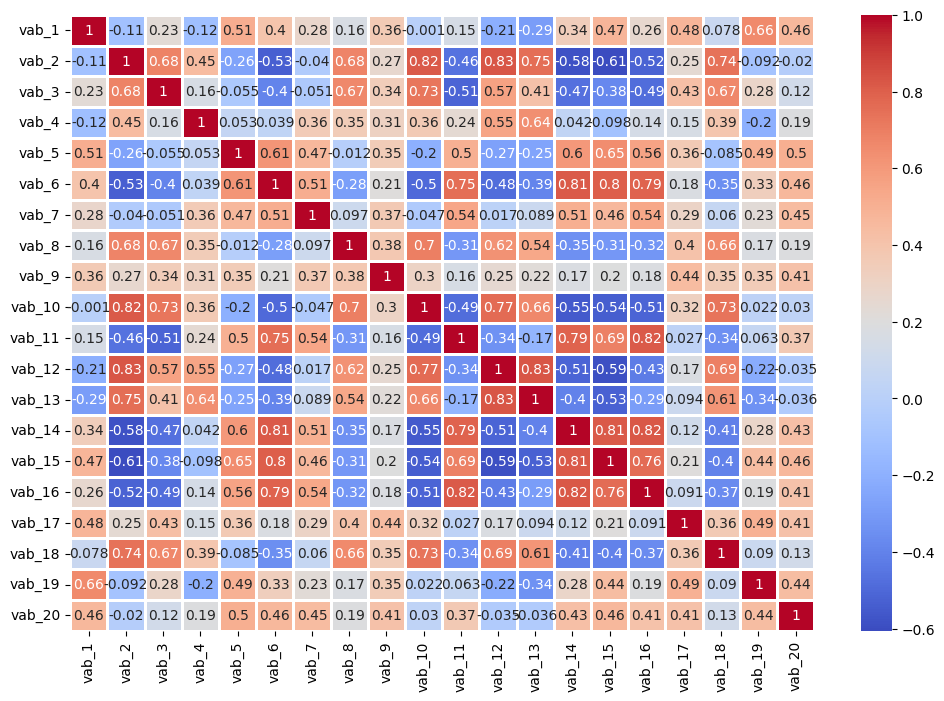

In [464]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='coolwarm',annot=True,linewidths=1)
plt.show()

## data standardization

In [465]:
X_values = corr_dataset.iloc[:,:-1].values

In [466]:
y_values = corr_dataset.iloc[:,-1].values

In [467]:
scaler = StandardScaler()

In [468]:
X_values = scaler.fit_transform(X_values)

In [469]:
np.mean(X_values),np.std(X_values)

(-7.460343454113172e-16, 1.0)

In [470]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6   \
0    -0.570717  0.607233  0.451045 -0.453966 -0.596323 -0.672746 -0.907338   
1     0.157233  0.460217  0.563736 -0.964069 -0.927867 -1.855082 -0.843524   
2    -0.035014  1.114399  1.330611 -0.586041  0.015299 -1.057858 -1.103753   
3    -0.067283  0.854677  0.412502 -0.064956  0.408012 -0.767380 -0.156019   
4    -0.323641  1.002340  0.084534  0.142917 -0.403135 -0.924283 -1.149454   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.117367 -0.022668 -0.376953  1.482892  0.006893  0.918206  0.742571   
9996 -0.494507  0.064833 -1.712400  1.043530 -0.791148  0.500880  0.797227   
9997 -0.629465 -0.684756 -1.197390  1.612852 -0.123605  0.741186  0.529088   
9998 -1.836103 -0.309788 -1.462797  0.981001  0.250438  0.658668  0.723027   
9999 -1.010235 -0.348829 -0.970479  1.253078  0.269494  0.451821  0.944937   

            7         8         9         10        11        12        13  \
0     0.322024  0.583808  0.463646 -0.928370  0.388713  0.969083 -0.886975   
1     1.271803  1.288652 -0.033980 -0.996715  0.194999  0.202357 -0.825849   
2     0.415313 -0.013194  0.337071 -1.159388  0.787662 -0.076134 -0.690901   
3     0.666835 -0.146411  0.522408 -0.412218  0.847949  0.764327 -1.135954   
4     0.708947 -0.017176  1.075832 -0.870587  0.687730  0.095624 -0.672724   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.678682 -0.522610 -0.690793  1.458853 -0.143195  1.168585  0.114769   
9996  0.205575  0.347237  0.028320  1.695375  0.774617  0.934267  1.176118   
9997 -0.648886 -0.772417 -0.929240  1.619370  0.117039  0.639935  0.361520   
9998 -0.257404 -0.209944 -0.455618  1.644061  0.302539  0.182089  0.274098   
9999 -0.570741 -0.326512  0.198481  1.343032  0.028441  0.605045  1.180138   

            14        15        16        17        18        19  
0    -1.064974 -0.513369  0.125807  0.736333 -0.324953  0.624982  
1    -0.759400 -0.911286  0.036019 -0.109415  0.549704  0.050360  
2    -0.795214 -0.861503  0.002566  0.830523  0.256954 -0.849348  
3    -0.891401 -0.785601  0.013835  0.860241  0.725202  0.443851  
4    -0.736386 -0.898393  0.632587  0.402257  0.763413 -0.305719  
...        ...       ...       ...       ...       ...       ...  
9995  0.549492  1.124453 -1.524306 -0.210820 -1.481939 -0.167792  
9996 -0.000064  1.390701 -0.621763 -0.283760 -1.740633 -0.043992  
9997  0.182997  1.524237 -0.136460 -0.855682 -0.943666  0.590816  
9998  0.429056  1.601605 -1.207597 -0.453945 -1.540324 -0.249919  
9999 -0.253270  1.632143  0.061711 -0.553052 -1.017242 -0.641474  

[10000 rows x 20 columns]

<Axes: ylabel='Density'>

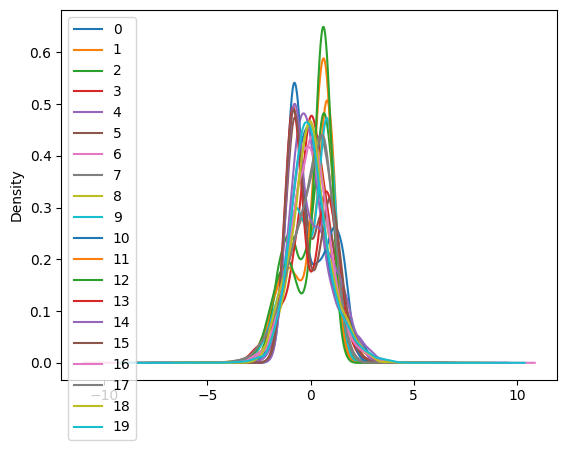

In [471]:
pd.DataFrame(X_values).plot(kind='density')

## pca 

In [472]:
pca_general = PCA()

In [473]:
pca_general.fit(X_values)

PCA()

In [474]:
explained_variance = pca_general.explained_variance_ratio_

In [475]:
explained_variance

array([0.39272334, 0.24265014, 0.115197  , 0.02717444, 0.02554969,
       0.02315011, 0.02173731, 0.01942932, 0.01724758, 0.01621673,
       0.01561151, 0.01289714, 0.01186043, 0.00981098, 0.00955192,
       0.00864003, 0.00787653, 0.00779604, 0.0075509 , 0.00732885])

In [476]:
eigenvalues = pca_general.explained_variance_

In [477]:
pd.DataFrame(eigenvalues)

0
0   7.855252
1   4.853488
2   2.304170
3   0.543543
4   0.511045
5   0.463048
6   0.434790
7   0.388625
8   0.344986
9   0.324367
10  0.312261
11  0.257969
12  0.237232
13  0.196239
14  0.191058
15  0.172818
16  0.157546
17  0.155936
18  0.151033
19  0.146592

In [478]:
eigenvectors = pca_general.components_

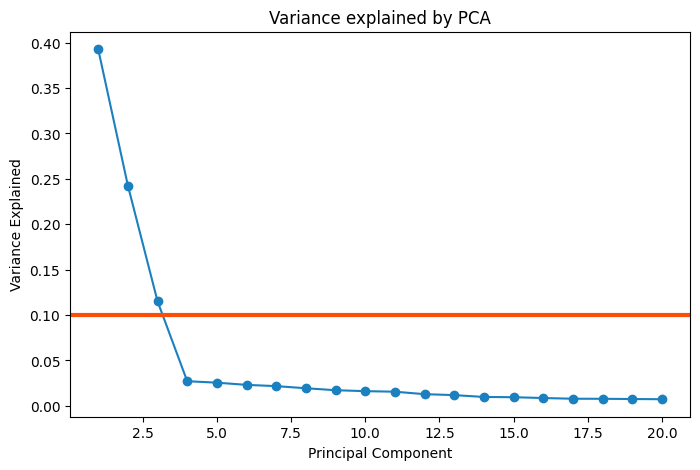

In [479]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [480]:
pca = PCA(n_components=3)

In [481]:
principal_components = pca.fit_transform(X_values)

In [482]:
pd.DataFrame(principal_components).head(8)

0         1         2
0 -2.436930 -0.109361 -0.312205
1 -2.304208 -0.237447 -1.684003
2 -2.711703 -0.289761 -1.440857
3 -2.277486  0.706221 -0.510448
4 -2.528735  0.056383 -0.944621
5 -2.571626  0.374532  0.362670
6 -2.508819  0.085332 -0.338139
7 -2.451890 -0.105913 -0.390083

In [483]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2','principal component 3'])

In [484]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [485]:
final_df

principal component 1  principal component 2  principal component 3  \
0                 -2.436930              -0.109361              -0.312205   
1                 -2.304208              -0.237447              -1.684003   
2                 -2.711703              -0.289761              -1.440857   
3                 -2.277486               0.706221              -0.510448   
4                 -2.528735               0.056383              -0.944621   
...                     ...                    ...                    ...   
9995               0.929431               0.025363               3.037095   
9996               0.906602               0.076651               3.657792   
9997               1.950707              -0.293956               2.979099   
9998               1.570205              -0.878484               3.544565   
9999               1.376133              -0.064360               2.983552   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9995       2  
9996       2  
9997       2  
9998       2  
9999       2  

[10000 rows x 4 columns]

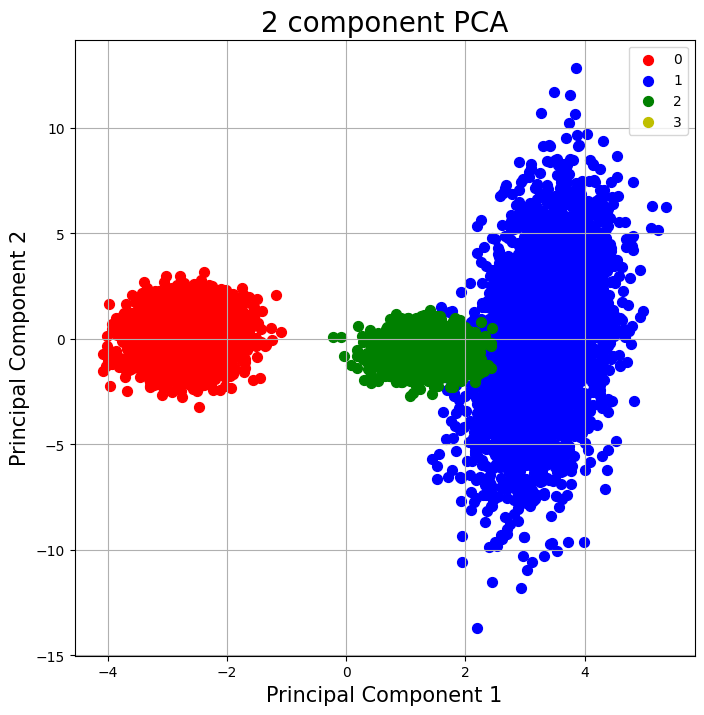

In [486]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

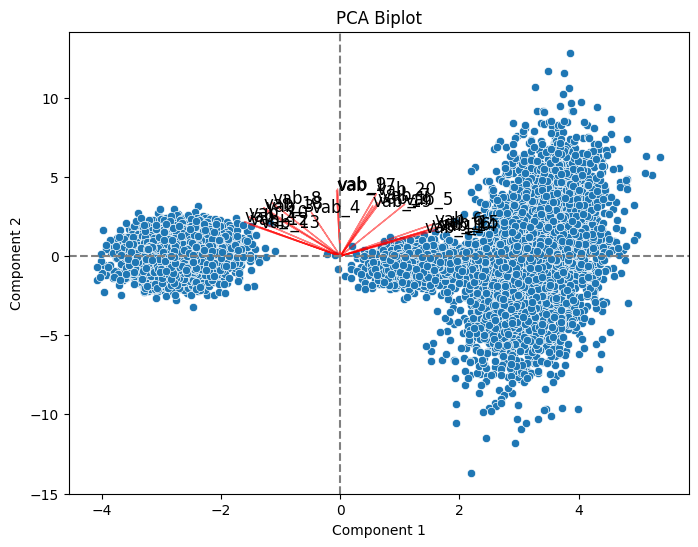

In [487]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

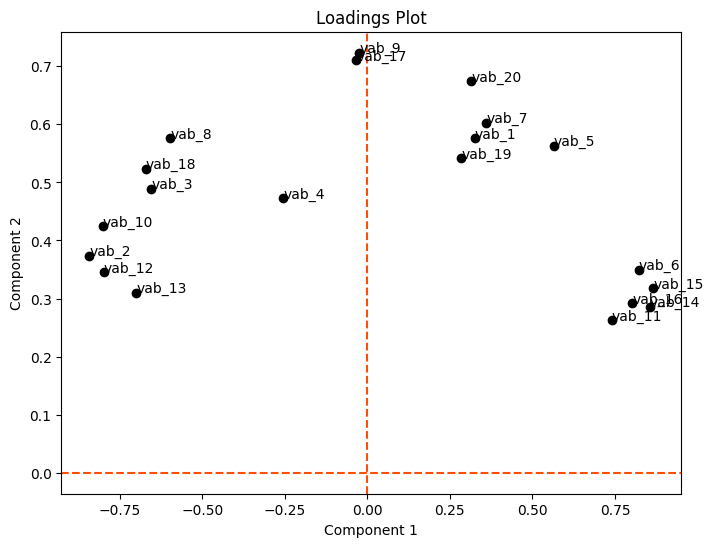

In [488]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

In [489]:
X_pca = pca.transform(X_values)

In [490]:
pd.DataFrame(X_pca).head()

0         1         2
0 -2.436930 -0.109361 -0.312205
1 -2.304208 -0.237447 -1.684003
2 -2.711703 -0.289761 -1.440857
3 -2.277486  0.706221 -0.510448
4 -2.528735  0.056383 -0.944621

## t-SNE

In [491]:
tsne = TSNE(n_components=3,random_state=42)

In [492]:
X_tsne = tsne.fit_transform(X_values)

In [493]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2','dim_3')),corr_dataset['target']],axis=1)

In [494]:
tsne_data

dim_1      dim_2      dim_3  target
0    -11.712811  -8.695723 -28.707584       0
1     -8.744247 -15.163175 -30.937391       0
2    -28.414726   9.430660  -0.880512       0
3    -10.675728  15.995994 -14.228918       0
4     -8.981282  -0.766934  -3.747345       0
...         ...        ...        ...     ...
9995   4.024406  -9.500208  34.687077       2
9996  24.221939   7.532055  22.035717       2
9997   1.412732   8.731037  20.973158       2
9998  10.885246  -2.982602  38.004463       2
9999  -1.720906  -0.262199  27.768785       2

[10000 rows x 4 columns]

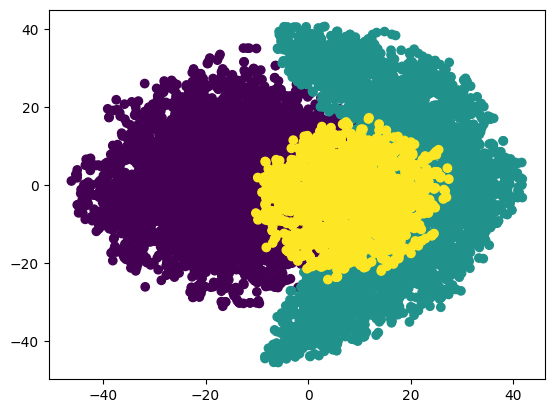

In [495]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [496]:
tsne.kl_divergence_

2.722219467163086

## umap

In [497]:
umap = umap.UMAP(n_components=3,random_state=42)

In [498]:
X_umap = umap.fit_transform(X_values)

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [499]:
umap_data = pd.concat([pd.DataFrame(X_umap,columns=('dim_1','dim_2','dim_3')),corr_dataset['target']],axis=1)

In [500]:
umap_data

dim_1     dim_2     dim_3  target
0     13.294813  4.398544  4.633641       0
1     13.651391  5.100195  4.136128       0
2     13.356398  5.871608  5.491374       0
3     14.291301  3.995940  5.256006       0
4     13.586559  4.907548  5.999743       0
...         ...       ...       ...     ...
9995  -9.261060  4.140595 -0.225932       2
9996  -9.624806  3.784259  0.133152       2
9997  -9.277852  3.851808 -0.819073       2
9998  -9.226910  4.435908 -0.298025       2
9999  -9.799796  4.091845 -0.334021       2

[10000 rows x 4 columns]

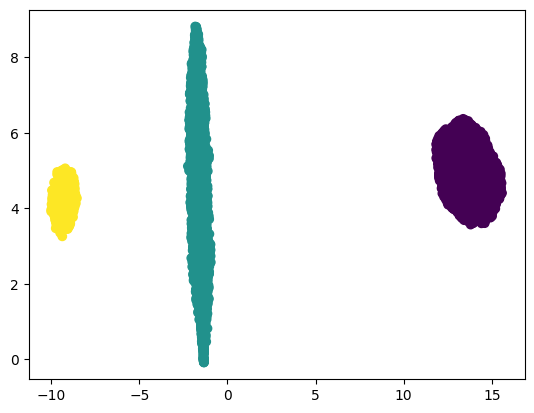

In [501]:
plt.scatter(umap_data['dim_1'],umap_data['dim_2'],c=umap_data['target'])
plt.show()

## k-means 

In [502]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [503]:
kmeans.fit(X_values)

KMeans(n_clusters=3, random_state=42)

In [504]:
df_kmeans = corr_dataset.copy()

In [505]:
df_kmeans['k_means'] = kmeans.labels_

In [506]:
df_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      k_means  
0           2  
1           2  
2           2  
3           2  
4           2  
...       ...  
9995        1  
9996        1  
9997        1  
9998        1  
9999        1  

[10000 rows x 22 columns]

In [507]:
y_true = df_kmeans['target'].values  
y_kmeans = df_kmeans['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_kmeans['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_kmeans['k_means'] == y_true))

accuracy before: 0.1727
accuracy after: 0.8273


In [508]:
df_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      k_means  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        2  
9996        2  
9997        2  
9998        2  
9999        2  

[10000 rows x 22 columns]

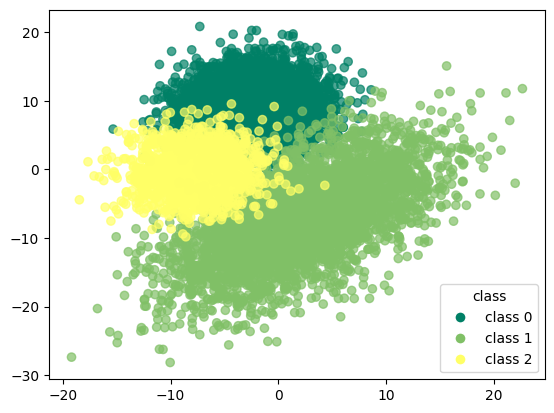

In [509]:
scatter = plt.scatter(df_kmeans.iloc[:, 0],df_kmeans.iloc[:, 1], 
                      c=df_kmeans['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_kmeans['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

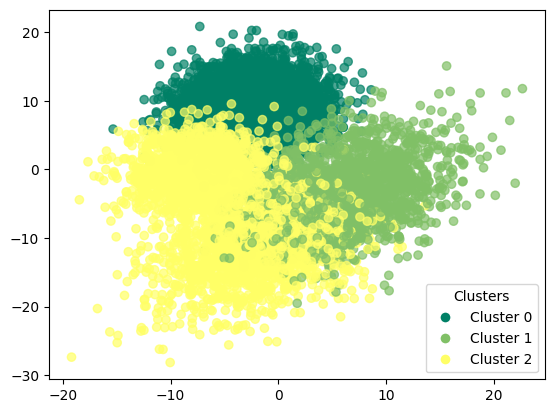

In [510]:
scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_kmeans['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [511]:
kmeans.cluster_centers_

array([[ 1.40122553, -0.61637676,  0.03040931, -0.0447488 ,  1.45963684,
         1.40898022,  1.03487331,  0.04885116,  0.8725577 , -0.42039035,
         1.00919552, -0.71400433, -0.74522372,  1.34295642,  1.52141758,
         1.20687326,  1.00399935, -0.14305058,  1.37768169,  1.25587682],
       [-0.51982623, -0.92366633, -1.15871003, -0.17135522, -0.06974107,
         0.45479101, -0.00498063, -0.97952309, -0.58408623, -1.01701915,
         0.69500587, -0.72622973, -0.4849314 ,  0.57835637,  0.40473004,
         0.61790493, -0.75633761, -0.95456618, -0.59875411, -0.31620983],
       [-0.15984188,  0.81494728,  0.73799961,  0.12656187, -0.47135283,
        -0.79238315, -0.36291969,  0.61568428,  0.0687256 ,  0.80593188,
        -0.80616616,  0.72190438,  0.57702282, -0.84887187, -0.79981409,
        -0.82628193,  0.1335304 ,  0.66745196, -0.10050888, -0.23999443]])

In [512]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[5000    0    0]
 [   0 1773 1727]
 [   0    0 1500]]


In [513]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.51      0.67      3500
           2       0.46      1.00      0.63      1500

    accuracy                           0.83     10000
   macro avg       0.82      0.84      0.77     10000
weighted avg       0.92      0.83      0.83     10000



In [514]:
adjusted_rand_score(df_kmeans['target'],df_kmeans['k_means'])

0.7624490513033636

In [515]:
normalized_mutual_info_score(df_kmeans['target'],df_kmeans['k_means'])

0.7692189705956035

In [516]:
silhouette_score(df_kmeans.drop(columns=['target','k_means']).values,df_kmeans['k_means'])

0.41501469842079386

### k-means with pca

In [517]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [518]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [519]:
df_pca_kmeans = corr_dataset.copy()

In [520]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [521]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_pca  
0              2  
1              2  
2              2  
3              0  
4              2  
...          ...  
9995           1  
9996           1  
9997           1  
9998           1  
9999           1  

[10000 rows x 22 columns]

In [522]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.6047
accuracy after: 0.6047


In [523]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_pca  
0              2  
1              2  
2              2  
3              0  
4              2  
...          ...  
9995           1  
9996           1  
9997           1  
9998           1  
9999           1  

[10000 rows x 22 columns]

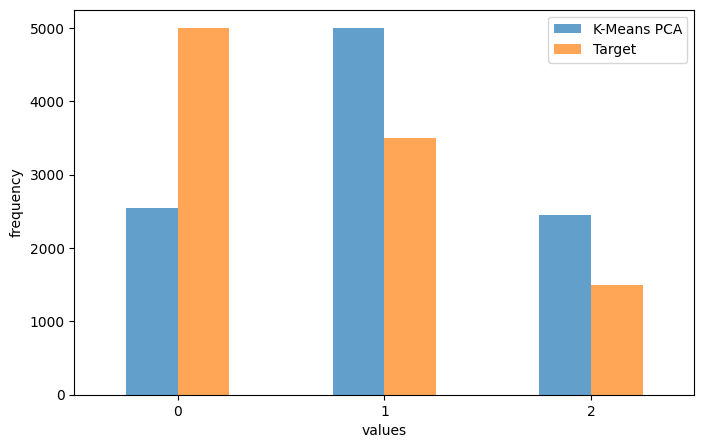

In [524]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [525]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2547    0 2453]
 [   0 3500    0]
 [   0 1500    0]]


In [526]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5000
           1       0.70      1.00      0.82      3500
           2       0.00      0.00      0.00      1500

    accuracy                           0.60     10000
   macro avg       0.57      0.50      0.50     10000
weighted avg       0.74      0.60      0.63     10000



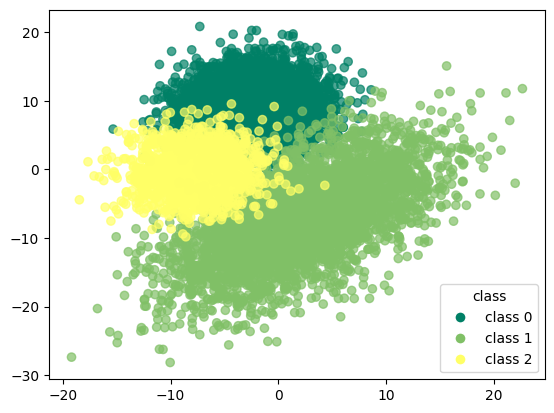

In [527]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

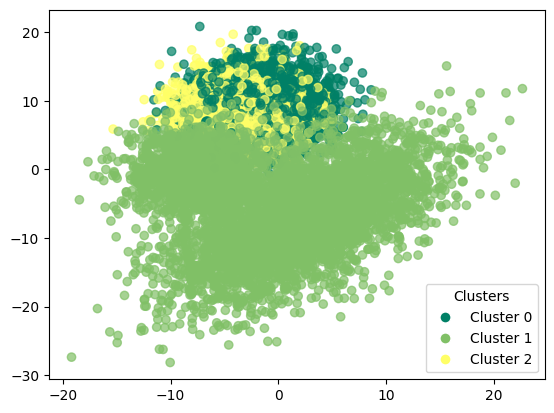

In [528]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

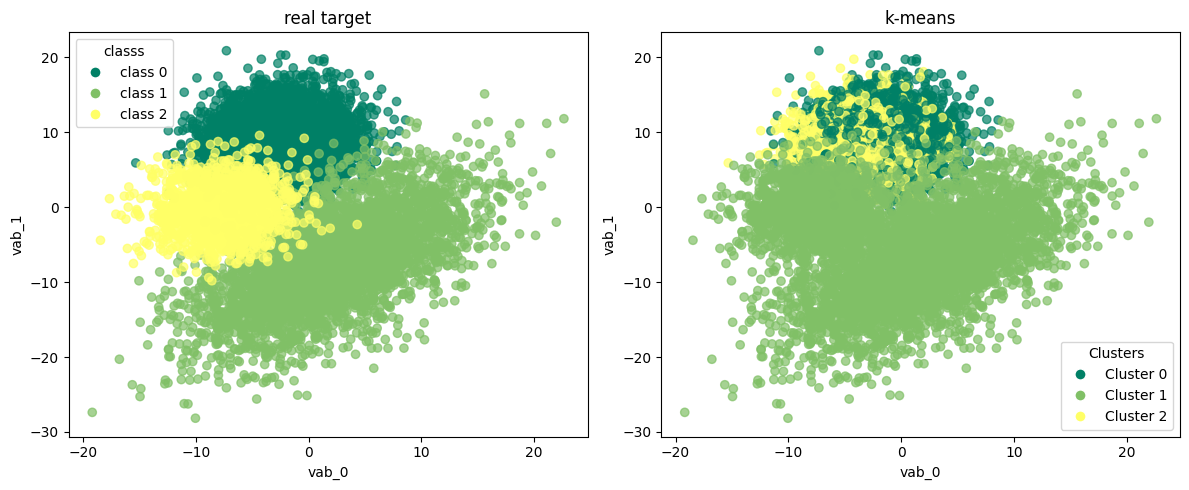

In [529]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

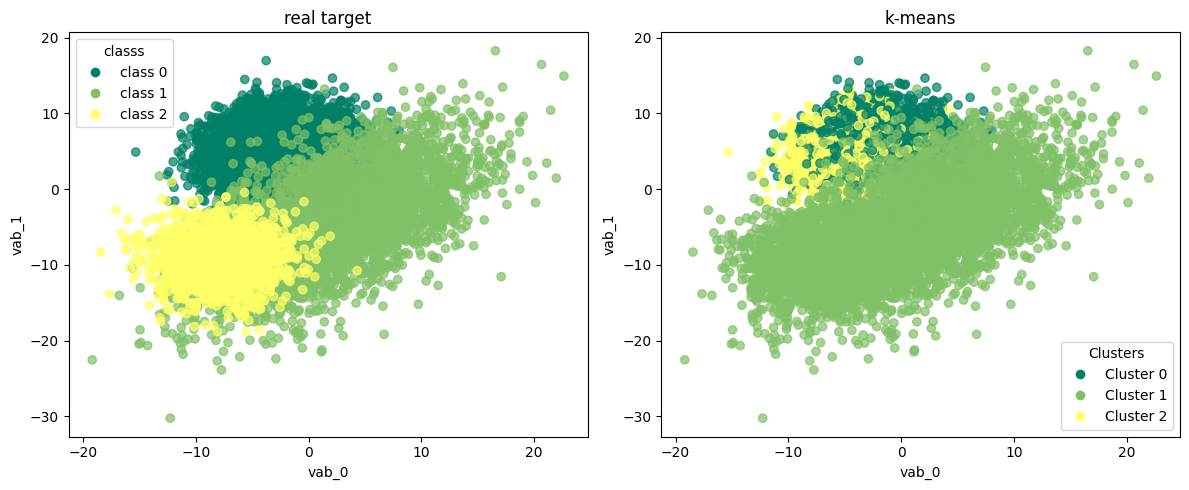

In [530]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

In [531]:
adjusted_rand_score(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca'])

0.514537139466505

In [532]:
normalized_mutual_info_score(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca'])

0.6801522804542579

In [537]:
silhouette_score(df_pca_kmeans.drop(columns=['target','kmeans_pca']).values,df_pca_kmeans['kmeans_pca'])

0.16080442980029783

### k-means with t-SNE

In [538]:
kmeans_tsne = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [539]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [540]:
df_tsne_kmeans = corr_dataset.copy()

In [541]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [542]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_tsne  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[10000 rows x 22 columns]

In [543]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.2295
accuracy after: 0.7223


In [544]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_tsne  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

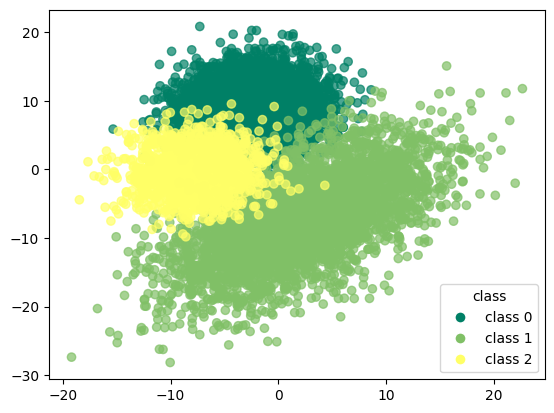

In [545]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

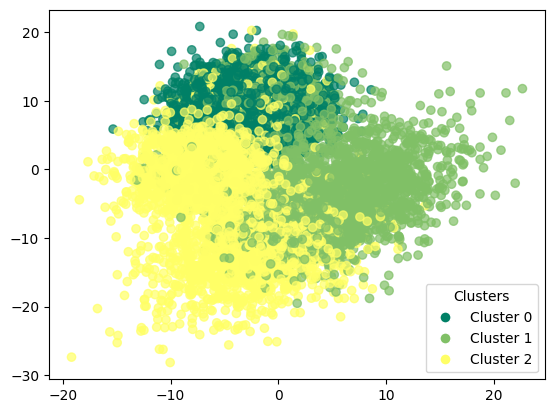

In [546]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

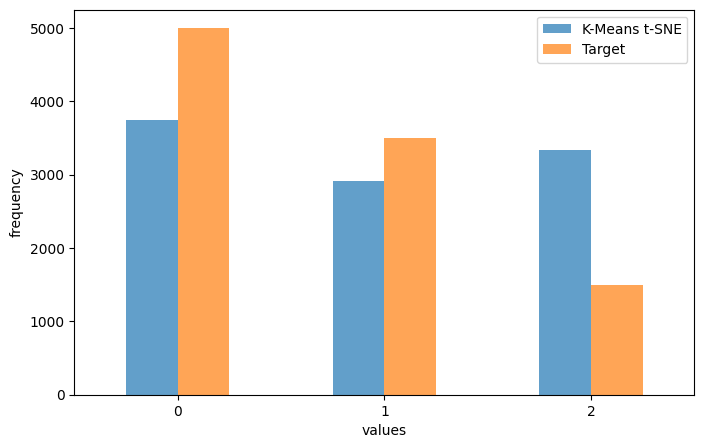

In [547]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [548]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[3750  826  424]
 [   0 2031 1469]
 [   0   58 1442]]


In [549]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      5000
           1       0.70      0.58      0.63      3500
           2       0.43      0.96      0.60      1500

    accuracy                           0.72     10000
   macro avg       0.71      0.76      0.70     10000
weighted avg       0.81      0.72      0.74     10000



In [550]:
adjusted_rand_score(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])

0.4287245621518938

In [551]:
normalized_mutual_info_score(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])

0.4488785147278288

In [552]:
silhouette_score(df_tsne_kmeans.drop(columns=['target','kmeans_tsne']).values,df_tsne_kmeans['kmeans_tsne'])

0.22550088813111502

### k-means with umap

In [553]:
kmeans_umap = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [554]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [555]:
df_umap_kmeans = corr_dataset.copy()

In [556]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [557]:
df_umap_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[10000 rows x 22 columns]

In [558]:
y_true = df_umap_kmeans['target'].values  
y_kmeans = df_umap_kmeans['kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_kmeans['kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_kmeans['kmeans_umap'] == y_true))

accuracy before: 0.5
accuracy after: 1.0


In [559]:
df_umap_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

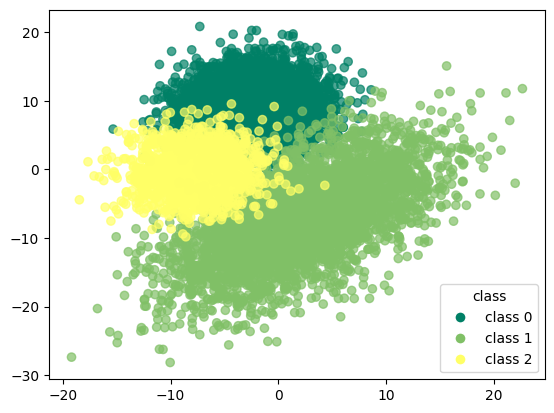

In [560]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

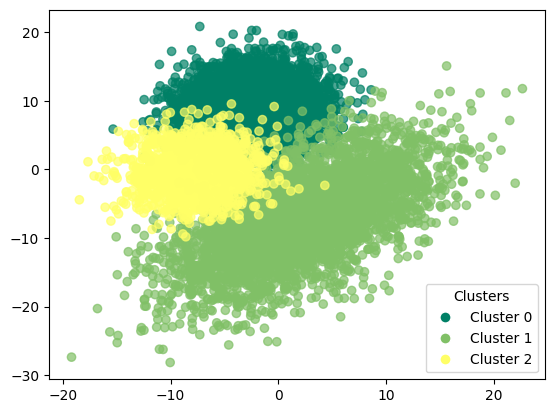

In [561]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

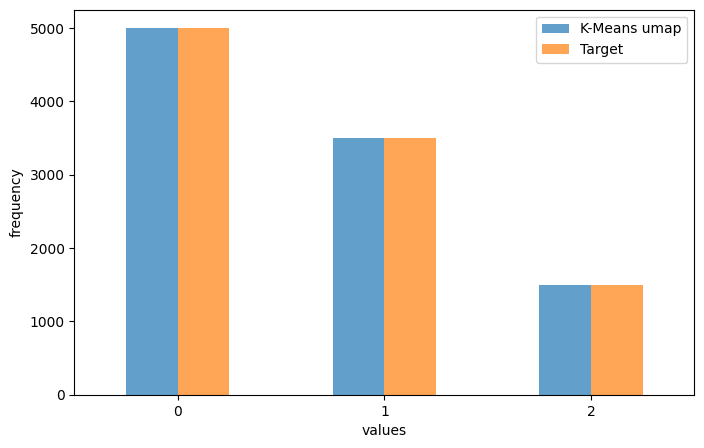

In [562]:
counts_kmeans = df_umap_kmeans['kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [563]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [564]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [565]:
adjusted_rand_score(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])

1.0

In [566]:
normalized_mutual_info_score(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])

1.0

In [567]:
silhouette_score(df_umap_kmeans.drop(columns=['target','kmeans_umap']).values,df_umap_kmeans['kmeans_umap'])

0.4247312484259025

## trimmed k-means

In [568]:
def trimmed_clustering(X,n_clusters,trim_fraction=0.1):

    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    distances = np.min(kmeans.transform(X),axis=1)
    
    trim_threshold = np.percentile(distances,100 * (1 - trim_fraction))
    trimmed_X = X[distances < trim_threshold]
    trimmed_indices = np.where(distances < trim_threshold)[0]
    trimmed_kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(trimmed_X)
    
    return trimmed_kmeans,trimmed_indices

In [569]:
trimmed_kmeans,trimmmed_indces = trimmed_clustering(X_values,n_clusters=3,trim_fraction=0.1)

In [570]:
trimmed_kmeans

KMeans(n_clusters=3, random_state=42)

In [571]:
df_trim_kmeans = corr_dataset.copy()

In [572]:
df_trim_kmeans = df_trim_kmeans.iloc[trimmmed_indces]  

In [573]:
df_trim_kmeans['trim_kmeans'] = trimmed_kmeans.labels_

In [574]:
df_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans  
0               2  
1               2  
2               2  
3               0  
4               2  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[9000 rows x 22 columns]

In [575]:
y_true = df_trim_kmeans['target'].values  
y_kmeans = df_trim_kmeans['trim_kmeans'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_trim_kmeans['trim_kmeans'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_trim_kmeans['trim_kmeans'] == y_true))

accuracy before: 0.5768888888888889
accuracy after: 0.5768888888888889


In [576]:
df_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans  
0               2  
1               2  
2               2  
3               0  
4               2  
...           ...  
9995            1  
9996            1  
9997            1  
9998            1  
9999            1  

[9000 rows x 22 columns]

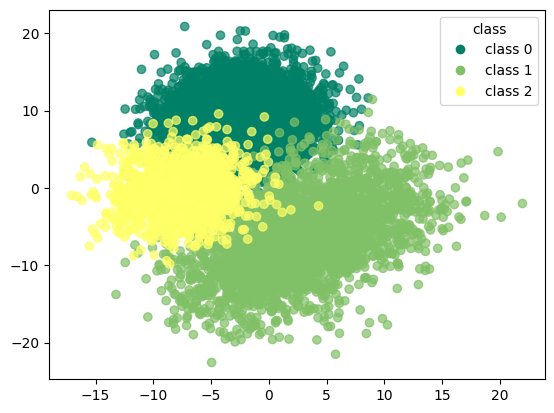

In [577]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

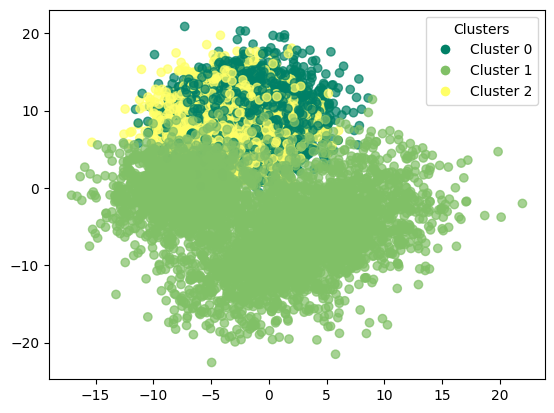

In [578]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['trim_kmeans'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_trim_kmeans['trim_kmeans'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [579]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[2528    0 2472]
 [   0 2664    0]
 [   0 1336    0]]


In [580]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5000
           1       0.67      1.00      0.80      2664
           2       0.00      0.00      0.00      1336

    accuracy                           0.58      9000
   macro avg       0.56      0.50      0.49      9000
weighted avg       0.75      0.58      0.61      9000



In [581]:
adjusted_rand_score(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans'])

0.490906882836424

In [582]:
normalized_mutual_info_score(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans'])

0.6728089747019983

In [583]:
silhouette_score(df_trim_kmeans.drop(columns=['target','trim_kmeans']).values,df_trim_kmeans['trim_kmeans'])

0.1730298507717051

### trimmed k-means with pca

In [584]:
trim_kmeans_pca,trimmmed_indices = trimmed_clustering(X_pca,n_clusters=3,trim_fraction=0.1)

In [585]:
trim_kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [586]:
df_pca_trim_kmeans = corr_dataset.copy()

In [587]:
df_pca_trim_kmeans = df_pca_trim_kmeans.iloc[trimmmed_indces]  

In [588]:
df_pca_trim_kmeans["trim_kmeans_pca"] = trim_kmeans_pca.labels_

In [589]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_pca  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9995                2  
9996                2  
9997                2  
9998                2  
9999                2  

[9000 rows x 22 columns]

In [590]:
y_true = df_pca_trim_kmeans['target'].values  
y_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_trim_kmeans['trim_kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_trim_kmeans['trim_kmeans_pca'] == y_true))

accuracy before: 0.9867777777777778
accuracy after: 0.9867777777777778


In [591]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_pca  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9995                2  
9996                2  
9997                2  
9998                2  
9999                2  

[9000 rows x 22 columns]

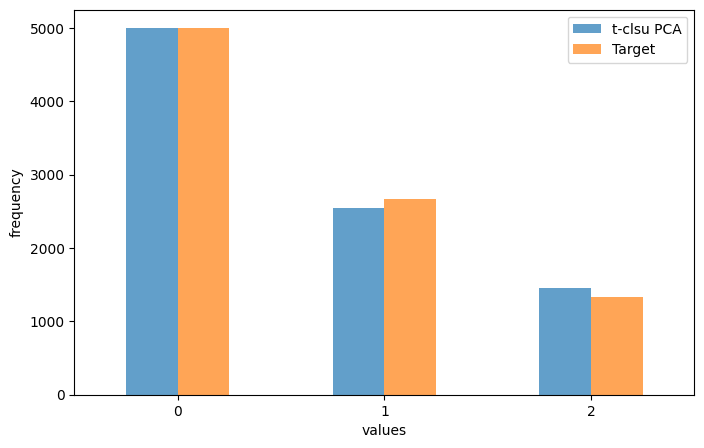

In [592]:
counts_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'t-clust PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["t-clsu PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [593]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[5000    0    0]
 [   0 2545  119]
 [   0    0 1336]]


In [594]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      0.96      0.98      2664
           2       0.92      1.00      0.96      1336

    accuracy                           0.99      9000
   macro avg       0.97      0.99      0.98      9000
weighted avg       0.99      0.99      0.99      9000



In [595]:
adjusted_rand_score(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca'])

0.9765357619354065

In [596]:
normalized_mutual_info_score(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca'])

0.9487814857858211

In [597]:
silhouette_score(df_pca_trim_kmeans.drop(columns=['target','trim_kmeans_pca']).values,df_pca_trim_kmeans['trim_kmeans_pca'])

0.44856409745666326

### trimmed k-means with t-SNE

In [598]:
trim_kmeans_tsne,trimmmed_indices = trimmed_clustering(X_tsne,n_clusters=3,trim_fraction=0.1)

In [599]:
trim_kmeans_tsne

KMeans(n_clusters=3, random_state=42)

In [600]:
df_tsne_trim_kmeans = corr_dataset.copy()

In [601]:
df_tsne_trim_kmeans = df_tsne_trim_kmeans.iloc[trimmmed_indces]  

In [602]:
df_tsne_trim_kmeans['trim_kmeans_tsne'] = trim_kmeans_tsne.labels_

In [603]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_tsne  
0                    0  
1                    0  
2                    0  
3                    0  
4                    2  
...                ...  
9995                 2  
9996                 2  
9997                 2  
9998                 2  
9999                 2  

[9000 rows x 22 columns]

In [604]:
y_true = df_tsne_trim_kmeans['target'].values  
y_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_trim_kmeans['trim_kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_trim_kmeans['trim_kmeans_tsne'] == y_true))

accuracy before: 0.7023333333333334
accuracy after: 0.7023333333333334


In [605]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_tsne  
0                    0  
1                    0  
2                    0  
3                    0  
4                    2  
...                ...  
9995                 2  
9996                 2  
9997                 2  
9998                 2  
9999                 2  

[9000 rows x 22 columns]

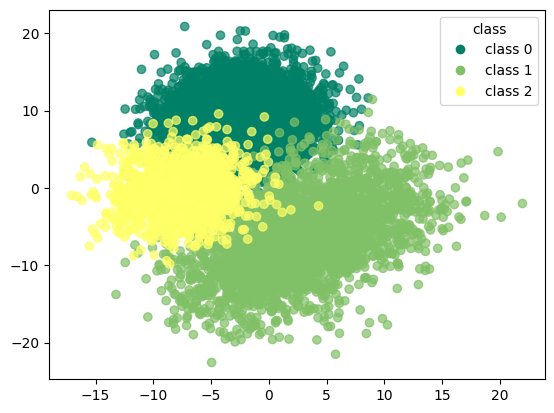

In [606]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

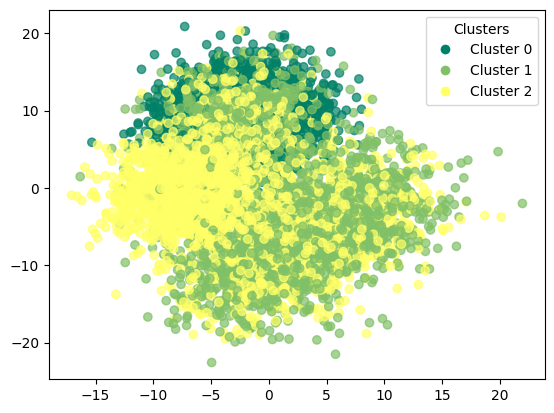

In [607]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['trim_kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_trim_kmeans['trim_kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

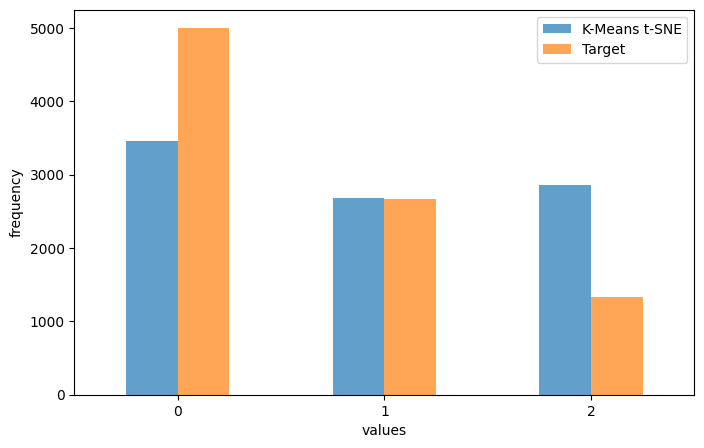

In [608]:
counts_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [609]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne']))

[[3458  967  575]
 [   0 1623 1041]
 [   0   96 1240]]


In [610]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      5000
           1       0.60      0.61      0.61      2664
           2       0.43      0.93      0.59      1336

    accuracy                           0.70      9000
   macro avg       0.68      0.74      0.67      9000
weighted avg       0.80      0.70      0.72      9000



In [611]:
adjusted_rand_score(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.36791358749167835

In [612]:
normalized_mutual_info_score(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.3876739398897371

In [613]:
silhouette_score(df_tsne_trim_kmeans.drop(columns=['target','trim_kmeans_tsne']).values,df_tsne_trim_kmeans['trim_kmeans_tsne'])

0.13894073476708213

### trimmed k-means with umap

In [614]:
trim_kmeans_umap,trimmmed_indices = trimmed_clustering(X_umap,n_clusters=3,trim_fraction=0.1)

In [615]:
trim_kmeans_umap

KMeans(n_clusters=3, random_state=42)

In [616]:
df_umap_trim_kmeans = corr_dataset.copy()

In [617]:
df_umap_trim_kmeans = df_umap_trim_kmeans.iloc[trimmmed_indices]

In [618]:
df_umap_trim_kmeans['trim_kmeans_umap'] = trim_kmeans_umap.labels_

In [619]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_umap  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 1  
9996                 1  
9997                 1  
9998                 1  
9999                 1  

[9000 rows x 22 columns]

In [620]:
y_true = df_umap_trim_kmeans['target'].values  
y_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_trim_kmeans['trim_kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_trim_kmeans['trim_kmeans_umap'] == y_true))

accuracy before: 0.5555555555555556
accuracy after: 1.0


In [621]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      trim_kmeans_umap  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 2  
9996                 2  
9997                 2  
9998                 2  
9999                 2  

[9000 rows x 22 columns]

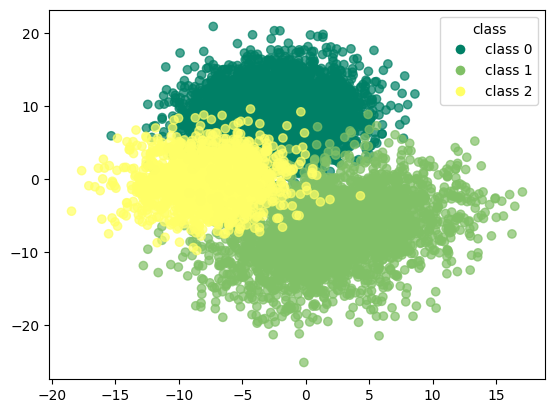

In [622]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

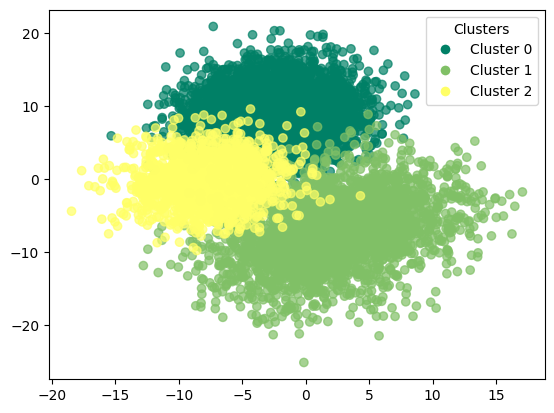

In [623]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['trim_kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_trim_kmeans['trim_kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

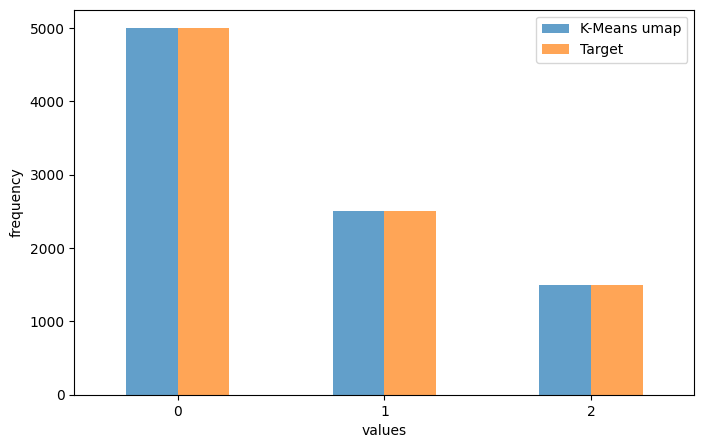

In [624]:
counts_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [625]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap']))

[[5000    0    0]
 [   0 2500    0]
 [   0    0 1500]]


In [626]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      2500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [627]:
adjusted_rand_score(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])

1.0

In [628]:
normalized_mutual_info_score(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])

1.0

In [629]:
silhouette_score(df_umap_trim_kmeans.drop(columns=['target','trim_kmeans_umap']).values,df_umap_trim_kmeans['trim_kmeans_umap'])

0.4779781981900241

## dbscan

In [630]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

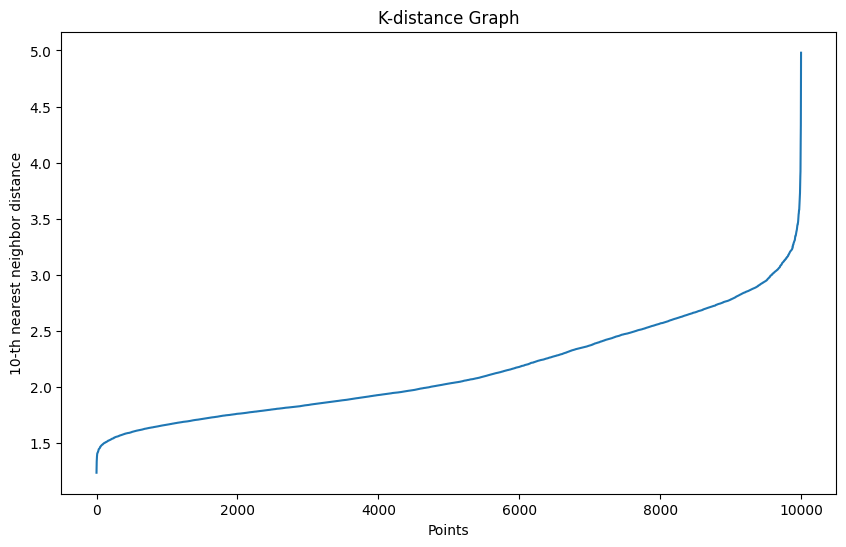

In [631]:
plot_k_distance_graph(X_values,k=10) 

In [632]:
dbscan = DBSCAN(eps=0.9,min_samples=10) # min_samples = 2*n_features

In [633]:
dbscan.fit(X_values)

DBSCAN(eps=0.9, min_samples=10)

In [634]:
df_dbscan = corr_dataset.copy()

In [635]:
df_dbscan['dbscan'] = dbscan.labels_

In [636]:
y_true = df_dbscan['target'].values  
y_kmeans = df_dbscan['dbscan'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_dbscan['dbscan'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_dbscan['dbscan'] == y_true))

accuracy before: 0.0
accuracy after: 0.0


In [637]:
df_dbscan

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      dbscan  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  
...      ...  
9995      -1  
9996      -1  
9997      -1  
9998      -1  
9999      -1  

[10000 rows x 22 columns]

In [638]:
print(df_dbscan['dbscan'].value_counts())

dbscan
-1    10000
Name: count, dtype: int64


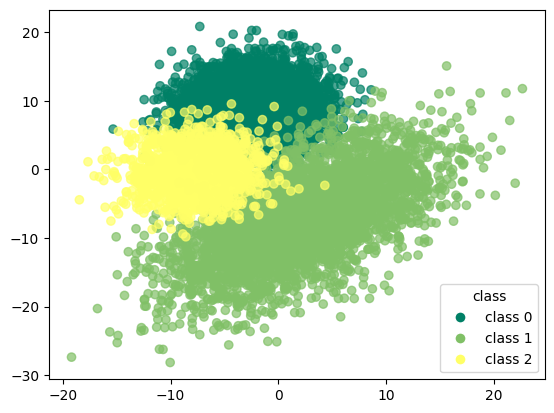

In [639]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_dbscan['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

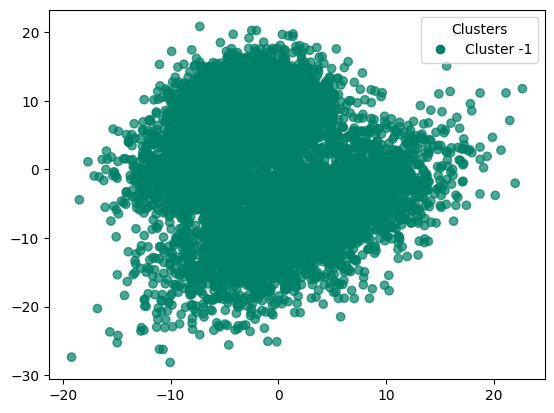

In [640]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['dbscan'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_dbscan['dbscan'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [641]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[   0    0    0    0]
 [5000    0    0    0]
 [3500    0    0    0]
 [1500    0    0    0]]


In [642]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    5000.0
           1       0.00      0.00      0.00    3500.0
           2       0.00      0.00      0.00    1500.0

    accuracy                           0.00   10000.0
   macro avg       0.00      0.00      0.00   10000.0
weighted avg       0.00      0.00      0.00   10000.0



In [643]:
adjusted_rand_score(df_dbscan['target'],df_dbscan['dbscan'])

0.0

In [644]:
normalized_mutual_info_score(df_dbscan['target'],df_dbscan['dbscan'])

0.0

In [646]:
# silhouette_score(df_dbscan.drop(columns=['target','dbscan']).values,df_dbscan['dbscan'])

### dbscan with pca

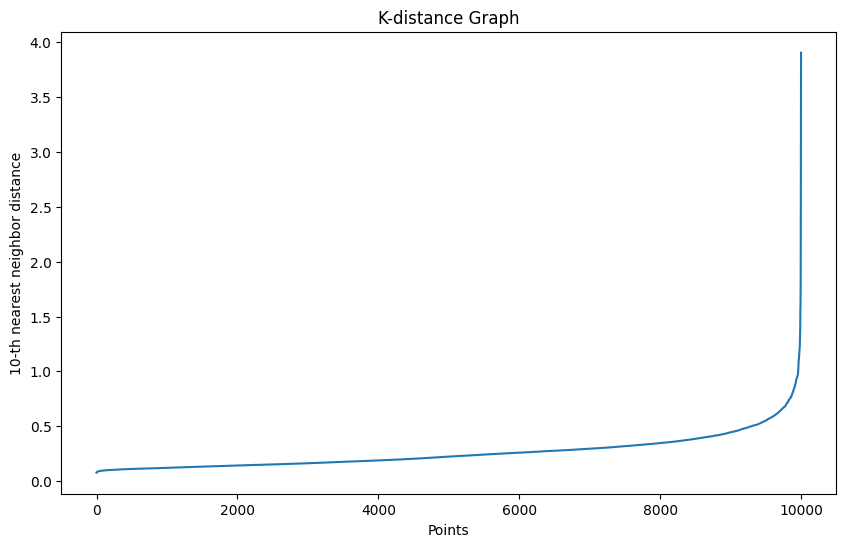

In [647]:
plot_k_distance_graph(X_pca,k=10)

In [648]:
dbscan_pca = DBSCAN(eps=0.4,min_samples=10)

In [649]:
dbscan_pca.fit(X_pca)

DBSCAN(eps=0.4, min_samples=10)

In [650]:
df_pca_dbscan = corr_dataset.copy()

In [651]:
df_pca_dbscan["dbscan_pca"] = dbscan_pca.labels_

In [652]:
y_true = df_pca_dbscan['target'].values  
y_kmeans = df_pca_dbscan['dbscan_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_dbscan['dbscan_pca'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_dbscan['dbscan_pca'] == y_true))

accuracy before: 0.7875
accuracy after: 0.7875


In [653]:
df_pca_dbscan

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      dbscan_pca  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
9995           5  
9996           5  
9997           5  
9998           5  
9999           5  

[10000 rows x 22 columns]

In [654]:
print(df_pca_dbscan['dbscan_pca'].value_counts())

dbscan_pca
 0    4945
 1    2930
 5    1467
-1     627
 2      19
 4      12
Name: count, dtype: int64


In [655]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[   0    0    0    0    0    0]
 [  55 4945    0    0    0    0]
 [ 539    0 2930   19   12    0]
 [  33    0    0    0    0 1467]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


In [656]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.99      0.99      5000
           1       1.00      0.84      0.91      3500
           2       0.00      0.00      0.00      1500
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.79     10000
   macro avg       0.33      0.30      0.32     10000
weighted avg       0.85      0.79      0.82     10000



In [657]:
adjusted_rand_score(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca'])

0.9124164790063395

In [658]:
normalized_mutual_info_score(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca'])

0.8867722336515806

In [659]:
silhouette_score(df_pca_dbscan.drop(columns=['target','dbscan_pca']).values,df_pca_dbscan['dbscan_pca'])

0.3460724607688841

### dbscan with t-SNE

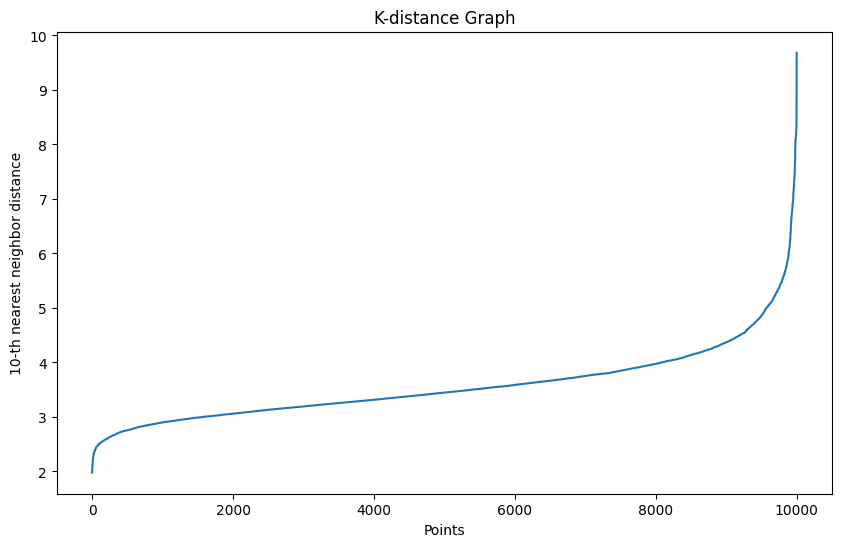

In [660]:
plot_k_distance_graph(X_tsne,k=10)

In [661]:
dbscan_tsne = DBSCAN(eps=3,min_samples=10)

In [662]:
dbscan_tsne.fit(X_tsne)

DBSCAN(eps=3, min_samples=10)

In [663]:
df_tsne_dbscan = corr_dataset.copy()

In [664]:
df_tsne_dbscan['dbscan_tsne'] = dbscan_tsne.labels_

In [665]:
y_true = df_tsne_dbscan['target'].values  
y_kmeans = df_tsne_dbscan['dbscan_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_dbscan['dbscan_tsne'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_dbscan['dbscan_tsne'] == y_true))

accuracy before: 0.007
accuracy after: 0.0044


In [666]:
df_tsne_dbscan

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      dbscan_tsne  
0              -1  
1              -1  
2              -1  
3              -1  
4               1  
...           ...  
9995            3  
9996           -1  
9997          155  
9998           -1  
9999          148  

[10000 rows x 22 columns]

In [667]:
print(df_tsne_dbscan['dbscan_tsne'].value_counts())

dbscan_tsne
-1      5077
 97      537
 148     489
 94      487
 112     127
        ... 
 59        5
 71        4
 121       3
 147       3
 171       3
Name: count, Length: 173, dtype: int64


In [668]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[   0    0    0 ...    0    0    0]
 [3270   44   70 ...    0    0    0]
 [1175    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [669]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.01      0.02      5000
           1       0.00      0.00      0.00      3500
           2       0.00      0.00      0.00      1500
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00    

In [670]:
adjusted_rand_score(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne'])

0.125597712460307

In [671]:
normalized_mutual_info_score(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne'])

0.29033779614082766

In [672]:
silhouette_score(df_tsne_dbscan.drop(columns=['target','dbscan_tsne']).values,df_tsne_dbscan['dbscan_tsne'])

-0.27987776810703086

### dbscan with umap

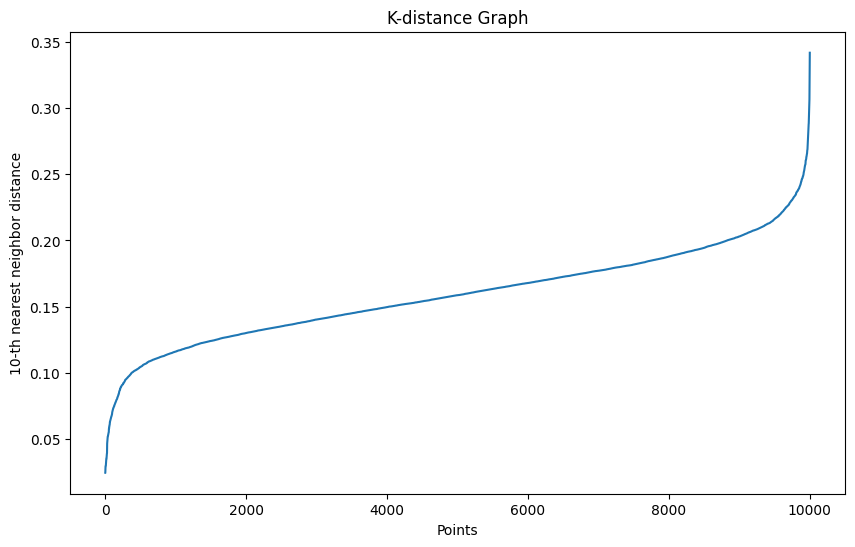

In [673]:
plot_k_distance_graph(X_umap,k=10)

In [674]:
dbscan_umap = DBSCAN(eps=0.6,min_samples=10)

In [675]:
dbscan_umap.fit(X_umap)

DBSCAN(eps=0.6, min_samples=10)

In [676]:
df_umap_dbscan = corr_dataset.copy()

In [677]:
df_umap_dbscan['dbscan_umap'] = dbscan_umap.labels_

In [678]:
y_true = df_umap_dbscan['target'].values  
y_kmeans = df_umap_dbscan['dbscan_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_dbscan['dbscan_umap'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_dbscan['dbscan_umap'] == y_true))

accuracy before: 1.0
accuracy after: 1.0


In [679]:
df_umap_dbscan

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      dbscan_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            2  
9996            2  
9997            2  
9998            2  
9999            2  

[10000 rows x 22 columns]

In [680]:
print(df_umap_dbscan['dbscan_umap'].value_counts())

dbscan_umap
0    5000
1    3500
2    1500
Name: count, dtype: int64


In [681]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [682]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [683]:
adjusted_rand_score(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap'])

1.0

In [684]:
normalized_mutual_info_score(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap'])

1.0

In [685]:
silhouette_score(df_umap_dbscan.drop(columns=['target','dbscan_umap']).values,df_umap_dbscan['dbscan_umap'])

0.4247312484259025

## GMM - Gaussian Mixture Models

In [686]:
gmm = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [687]:
gmm.fit(X_values)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [688]:
df_gmm = corr_dataset.copy()

In [689]:
df_gmm['gmm'] = gmm.predict(X_values)

In [690]:
df_gmm

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      gmm  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
9995    2  
9996    2  
9997    2  
9998    2  
9999    2  

[10000 rows x 22 columns]

In [691]:
y_true = df_gmm['target'].values  
y_kmeans = df_gmm['gmm'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_gmm['gmm'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_gmm['gmm'] == y_true))

accuracy before: 1.0
accuracy after: 1.0


In [692]:
df_gmm

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      gmm  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
9995    2  
9996    2  
9997    2  
9998    2  
9999    2  

[10000 rows x 22 columns]

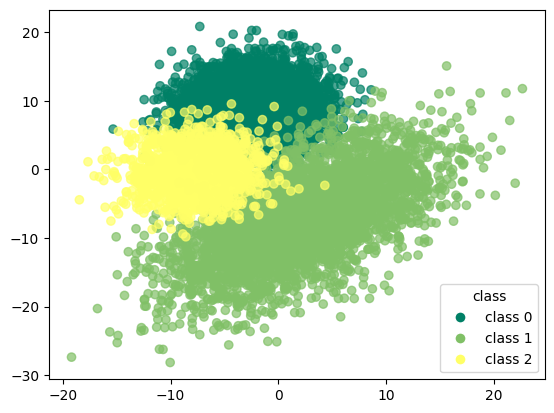

In [693]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

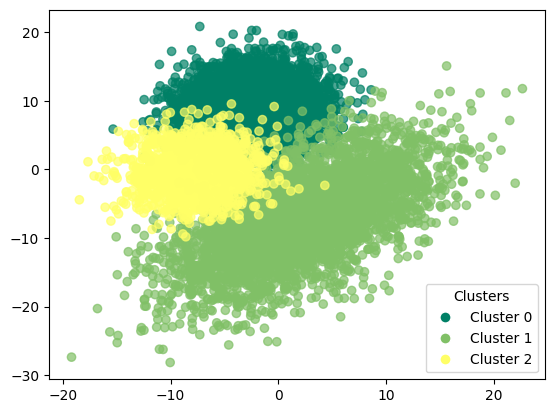

In [694]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [695]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [696]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [697]:
adjusted_rand_score(df_gmm['target'],df_gmm['gmm'])

1.0

In [698]:
normalized_mutual_info_score(df_gmm['target'],df_gmm['gmm'])

1.0

In [699]:
silhouette_score(df_gmm.drop(columns=['target','gmm']).values,df_gmm['gmm'])

0.4247312484259025

### GMM with pca

In [700]:
gmm_pca = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [701]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [702]:
df_pca_gmm = corr_dataset.copy()

In [703]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [704]:
df_pca_gmm

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      gmm_pca  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        2  
9996        2  
9997        2  
9998        2  
9999        2  

[10000 rows x 22 columns]

In [705]:
y_true = df_pca_gmm['target'].values  
y_kmeans = df_pca_gmm['gmm_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_gmm['gmm_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_gmm['gmm_pca'] == y_true))

accuracy before: 1.0
accuracy after: 1.0


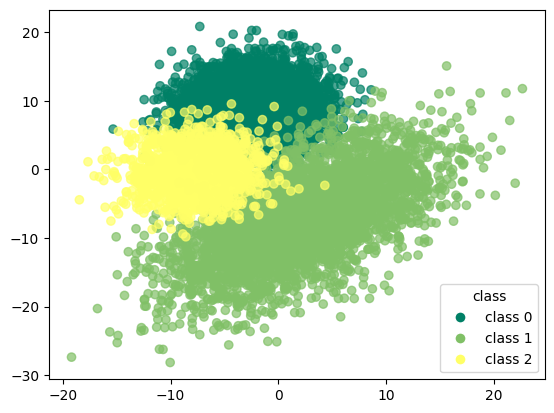

In [706]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

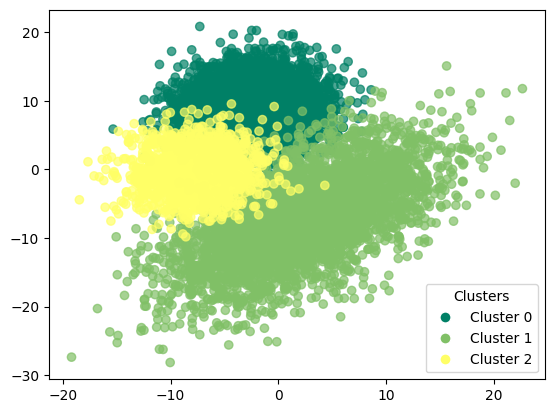

In [707]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [708]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [709]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [710]:
adjusted_rand_score(df_pca_gmm['target'],df_pca_gmm['gmm_pca'])

1.0

In [711]:
normalized_mutual_info_score(df_pca_gmm['target'],df_pca_gmm['gmm_pca'])

1.0

In [712]:
silhouette_score(df_pca_gmm.drop(columns=['target','gmm_pca']).values,df_pca_gmm['gmm_pca'])

0.4247312484259025

### GMM with t-SNE

In [713]:
gmm_tsne = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [714]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [715]:
df_tsne_gmm = corr_dataset.copy()

In [716]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [717]:
df_tsne_gmm

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      gmm_tsne  
0            0  
1            0  
2            2  
3            0  
4            2  
...        ...  
9995         1  
9996         1  
9997         1  
9998         1  
9999         1  

[10000 rows x 22 columns]

In [718]:
y_true = df_tsne_gmm['target'].values  
y_kmeans = df_tsne_gmm['gmm_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_gmm['gmm_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_gmm['gmm_tsne'] == y_true))

accuracy before: 0.2962
accuracy after: 0.6325


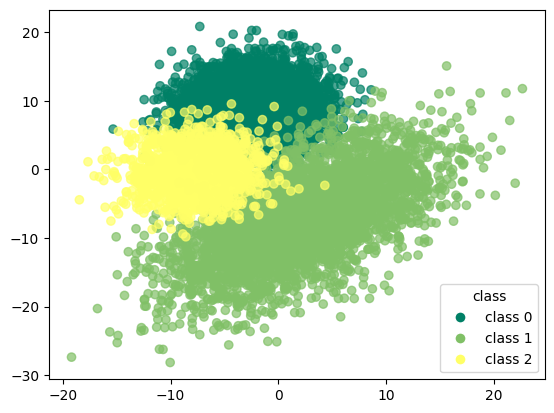

In [719]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

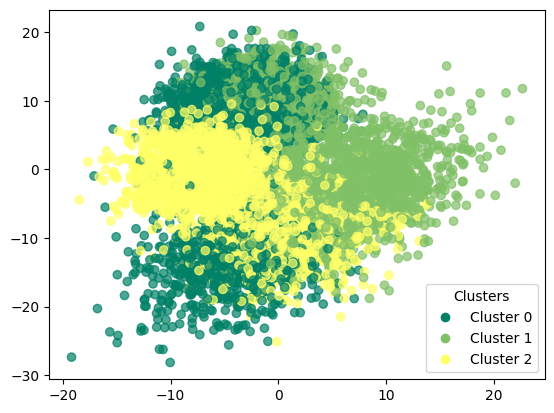

In [720]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [721]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[3261 1726   13]
 [ 700 1587 1213]
 [  23    0 1477]]


In [722]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      5000
           1       0.48      0.45      0.47      3500
           2       0.55      0.98      0.70      1500

    accuracy                           0.63     10000
   macro avg       0.61      0.70      0.63     10000
weighted avg       0.66      0.63      0.63     10000



In [723]:
adjusted_rand_score(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne'])

0.2906012873451742

In [724]:
normalized_mutual_info_score(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne'])

0.36161308476869614

In [725]:
silhouette_score(df_tsne_gmm.drop(columns=['target','gmm_tsne']).values,df_tsne_gmm['gmm_tsne'])

0.11219439308092646

### GMM with umap

In [726]:
gmm_umap = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [727]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [728]:
df_umap_gmm = corr_dataset.copy()

In [729]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [730]:
df_umap_gmm

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      gmm_umap  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
9995         1  
9996         1  
9997         1  
9998         1  
9999         1  

[10000 rows x 22 columns]

In [731]:
y_true = df_umap_gmm['target'].values  
y_kmeans = df_umap_gmm['gmm_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_gmm['gmm_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_gmm['gmm_umap'] == y_true))

accuracy before: 0.5
accuracy after: 1.0


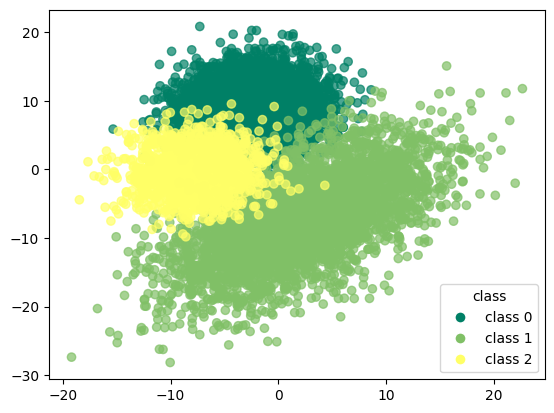

In [732]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

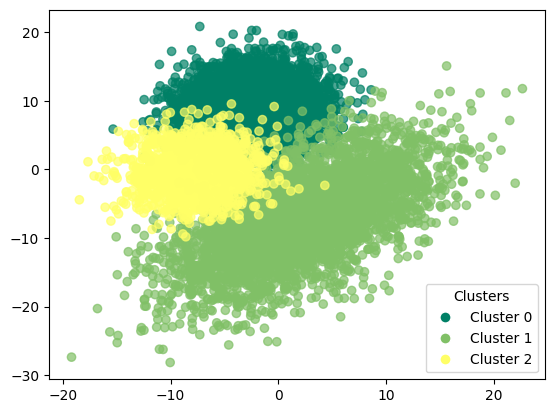

In [733]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [734]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [735]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [736]:
adjusted_rand_score(df_umap_gmm['target'],df_umap_gmm['gmm_umap'])

1.0

In [737]:
normalized_mutual_info_score(df_umap_gmm['target'],df_umap_gmm['gmm_umap'])

1.0

In [738]:
silhouette_score(df_umap_gmm.drop(columns=['target','gmm_umap']).values,df_umap_gmm['gmm_umap'])

0.4247312484259025

## pam

In [739]:
initial_medoids = np.random.choice(len(X_values),3,replace=False)

In [740]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [741]:
pam = kmedoids(X_values,initial_medoids,metric=metric)

In [742]:
pam.process()

In [743]:
clusters = pam.get_clusters()

In [744]:
medoids = pam.get_medoids()

In [745]:
labels = np.zeros(len(X_values))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [746]:
df_pam = corr_dataset.copy()

In [747]:
df_pam['pam'] = labels

In [748]:
df_pam

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
...   ...  
9995  2.0  
9996  2.0  
9997  2.0  
9998  2.0  
9999  2.0  

[10000 rows x 22 columns]

In [749]:
y_true = df_pam['target'].values  
y_kmeans = df_pam['pam'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam['pam'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam['pam'] == y_true))

accuracy before: 0.15
accuracy after: 0.999


In [750]:
df_pam

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
9995    2  
9996    2  
9997    2  
9998    2  
9999    2  

[10000 rows x 22 columns]

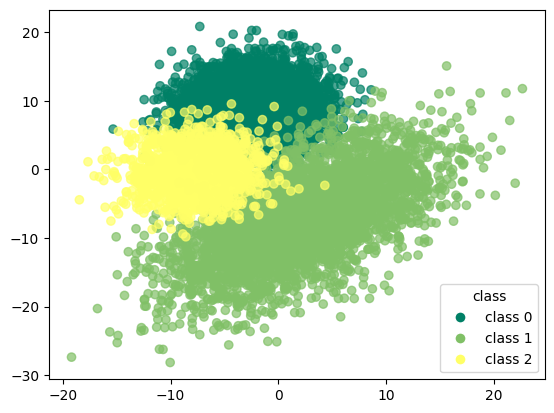

In [751]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

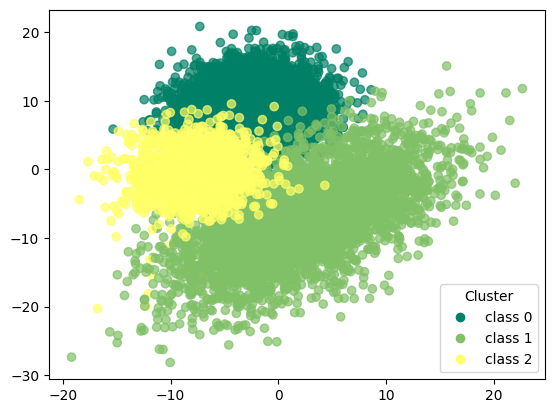

In [752]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [753]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[5000    0    0]
 [   0 3490   10]
 [   0    0 1500]]


In [754]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       0.99      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [755]:
adjusted_rand_score(df_pam['target'],df_pam['pam'])

0.9979112300372591

In [756]:
normalized_mutual_info_score(df_pam['target'],df_pam['pam'])

0.9935583299789806

In [757]:
silhouette_score(df_pam.drop(columns=['target','pam']).values,df_pam['pam'])

0.4251868654731361

### pam with pca

In [758]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [759]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [760]:
pam_pca = kmedoids(X_pca,initial_medoids,metric=metric)

In [761]:
pam_pca.process()

In [762]:
clusters = pam_pca.get_clusters()

In [763]:
medoids = pam_pca.get_medoids()

In [764]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [765]:
df_pam_pca = corr_dataset.copy()

In [766]:
df_pam_pca['pam_pca'] = labels

In [767]:
df_pam_pca

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_pca  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
9995      2.0  
9996      2.0  
9997      2.0  
9998      2.0  
9999      2.0  

[10000 rows x 22 columns]

In [768]:
y_true = df_pam_pca['target'].values  
y_kmeans = df_pam_pca['pam_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_pca['pam_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_pca['pam_pca'] == y_true))

accuracy before: 0.9999
accuracy after: 0.9999


In [769]:
df_pam_pca

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_pca  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        2  
9996        2  
9997        2  
9998        2  
9999        2  

[10000 rows x 22 columns]

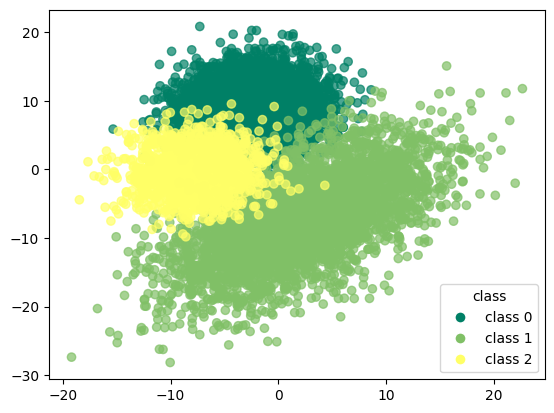

In [770]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

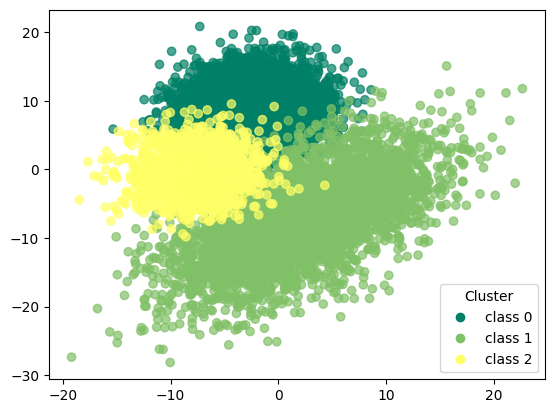

In [771]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [772]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[5000    0    0]
 [   0 3499    1]
 [   0    0 1500]]


In [773]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [774]:
adjusted_rand_score(df_pam_pca['target'],df_pam_pca['pam_pca'])

0.9997907792130399

In [775]:
normalized_mutual_info_score(df_pam_pca['target'],df_pam_pca['pam_pca'])

0.9991250976470251

In [776]:
silhouette_score(df_pam_pca.drop(columns=['target','pam_pca']).values,df_pam_pca['pam_pca'])

0.42468213317908377

### pam with t-SNE

In [777]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [778]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [779]:
pam_tsne = kmedoids(X_tsne,initial_medoids,metric=metric)

In [780]:
pam_tsne.process()

In [781]:
clusters = pam_tsne.get_clusters()

In [782]:
medoids = pam_tsne.get_medoids()

In [783]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [784]:
df_pam_tsne = corr_dataset.copy()

In [785]:
df_pam_tsne['pam_tsne'] = labels

In [786]:
df_pam_tsne

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_tsne  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
...        ...  
9995       2.0  
9996       2.0  
9997       2.0  
9998       2.0  
9999       2.0  

[10000 rows x 22 columns]

In [787]:
y_true = df_pam_tsne['target'].values  
y_kmeans = df_pam_tsne['pam_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_tsne['pam_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_tsne['pam_tsne'] == y_true))

accuracy before: 0.18
accuracy after: 0.6679


In [788]:
df_pam_tsne

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_tsne  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
9995         2  
9996         2  
9997         2  
9998         2  
9999         2  

[10000 rows x 22 columns]

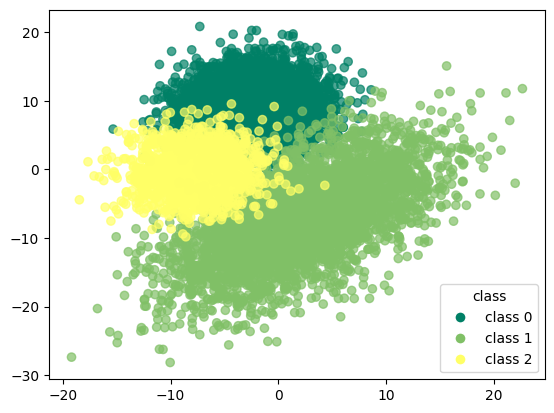

In [789]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

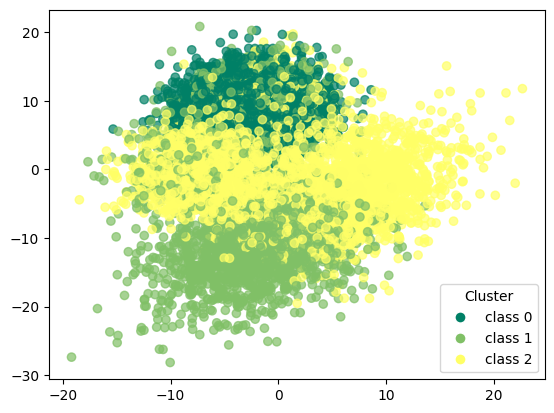

In [790]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [791]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[3794  649  557]
 [   0 1734 1766]
 [   2  347 1151]]


In [792]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      5000
           1       0.64      0.50      0.56      3500
           2       0.33      0.77      0.46      1500

    accuracy                           0.67     10000
   macro avg       0.66      0.67      0.63     10000
weighted avg       0.77      0.67      0.70     10000



In [793]:
adjusted_rand_score(df_pam_tsne['target'],df_pam_tsne['pam_tsne'])

0.3985534444505585

In [794]:
normalized_mutual_info_score(df_pam_tsne['target'],df_pam_tsne['pam_tsne'])

0.38770256196939973

In [795]:
silhouette_score(df_pam_tsne.drop(columns=['target','pam_tsne']).values,df_pam_tsne['pam_tsne'])

0.2206892962237404

### pam with umap

In [796]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [797]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [798]:
pam_umap = kmedoids(X_umap,initial_medoids,metric=metric)

In [799]:
pam_umap.process()

In [800]:
clusters = pam_umap.get_clusters()

In [801]:
medoids = pam_umap.get_medoids()

In [802]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [803]:
df_pam_umap = corr_dataset.copy()

In [804]:
df_pam_umap['pam_umap'] = labels

In [805]:
df_pam_umap

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_umap  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
...        ...  
9995       0.0  
9996       0.0  
9997       0.0  
9998       0.0  
9999       0.0  

[10000 rows x 22 columns]

In [806]:
y_true = df_pam_umap['target'].values  
y_kmeans = df_pam_umap['pam_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_umap['pam_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_umap['pam_umap'] == y_true))

accuracy before: 0.0
accuracy after: 1.0


In [807]:
df_pam_umap

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      pam_umap  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
9995         2  
9996         2  
9997         2  
9998         2  
9999         2  

[10000 rows x 22 columns]

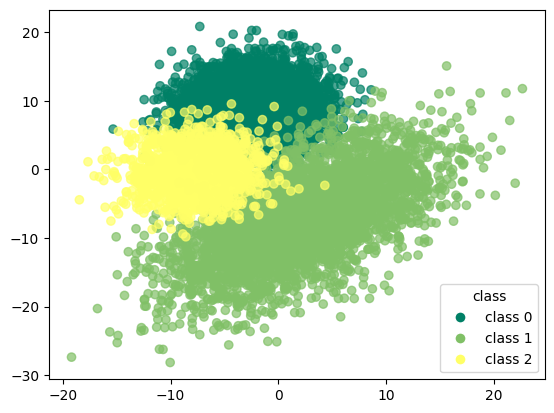

In [808]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

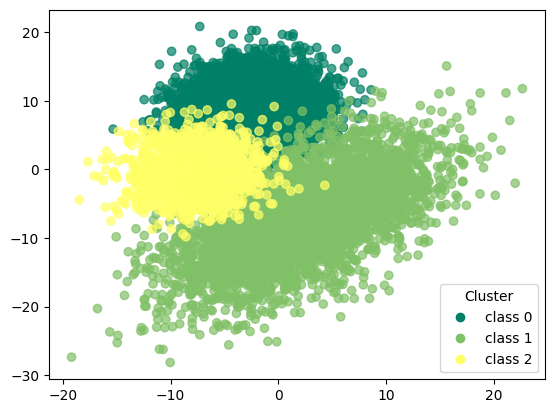

In [809]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [810]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [811]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [812]:
adjusted_rand_score(df_pam_umap['target'],df_pam_umap['pam_umap'])

1.0

In [813]:
normalized_mutual_info_score(df_pam_umap['target'],df_pam_umap['pam_umap'])

1.0

In [814]:
silhouette_score(df_pam_umap.drop(columns=['target','pam_umap']).values,df_pam_umap['pam_umap'])

0.4247312484259025

## spectral clustering

In [815]:
spectral_clustering = SpectralClustering(n_clusters=3,affinity ='rbf')

In [816]:
spectral_clustering.fit(X_values)

SpectralClustering(n_clusters=3)

In [817]:
df_spectral = corr_dataset.copy()

In [818]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [819]:
df_spectral

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      spectral_clustering  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
9995                    2  
9996                    2  
9997                    2  
9998                    2  
9999                    2  

[10000 rows x 22 columns]

In [820]:
y_true = df_spectral['target'].values  
y_spectral = df_spectral['spectral_clustering'].values  

conf_matrix = confusion_matrix(y_true, y_spectral)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_spectral['spectral_clustering'] = np.array([mapping[label] for label in y_spectral])

print("accuracy before:", np.mean(y_spectral == y_true))
print("accuracy after:", np.mean(df_spectral['spectral_clustering'] == y_true))

accuracy before: 0.15
accuracy after: 1.0


In [821]:
df_spectral

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      spectral_clustering  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9995                    2  
9996                    2  
9997                    2  
9998                    2  
9999                    2  

[10000 rows x 22 columns]

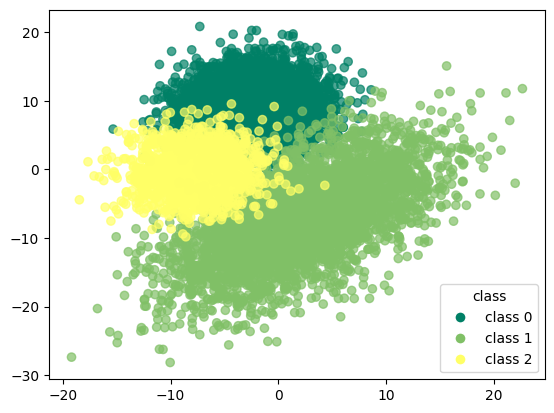

In [822]:
scatter = plt.scatter(df_spectral.iloc[:, 0],df_spectral.iloc[:, 1], 
                      c=df_spectral['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_spectral['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

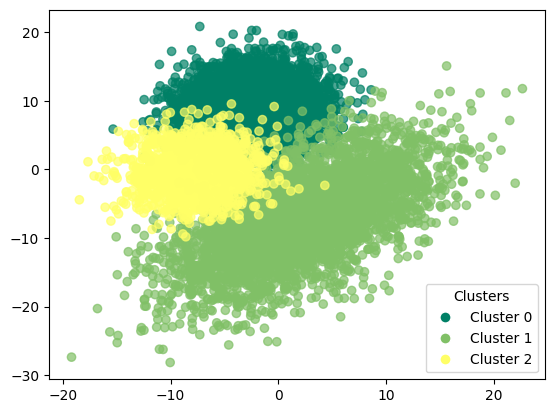

In [823]:
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [824]:
print(confusion_matrix(df_spectral['target'],df_spectral['spectral_clustering']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [825]:
print(classification_report(df_spectral['target'],df_spectral['spectral_clustering']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [826]:
adjusted_rand_score(df_spectral['target'],df_spectral['spectral_clustering'])

1.0

In [827]:
normalized_mutual_info_score(df_spectral['target'],df_spectral['spectral_clustering'])

1.0

In [828]:
silhouette_score(df_spectral.drop(columns=['target','spectral_clustering']).values,df_spectral['spectral_clustering'])

0.4247312484259025

### spectral clustering with pca

In [829]:
spectral_pca = SpectralClustering(n_clusters=3,affinity ='rbf')

In [830]:
spectral_pca.fit(X_pca)

SpectralClustering(n_clusters=3)

In [831]:
df_pca_spectral = corr_dataset.copy()

In [832]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [833]:
df_pca_spectral

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      spectral_pca  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
9995             2  
9996             2  
9997             2  
9998             2  
9999             2  

[10000 rows x 22 columns]

In [834]:
y_true = df_pca_spectral['target'].values  
y_spectral_pca = df_pca_spectral['spectral_pca'].values  

conf_matrix = confusion_matrix(y_true, y_spectral_pca)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_spectral['spectral_pca'] = np.array([mapping[label] for label in y_spectral_pca])

print("accuracy before:", np.mean(y_spectral_pca == y_true))
print("accuracy after:", np.mean(df_pca_spectral['spectral_pca'] == y_true))

accuracy before: 1.0
accuracy after: 1.0


In [835]:
df_pca_spectral

vab_1      vab_2      vab_3      vab_4     vab_5      vab_6  \
0     -4.758285   7.191290   2.604174  -1.378545 -7.579009  -5.924052   
1     -0.732528   5.919045   3.395496  -4.316339 -9.314733 -14.688826   
2     -1.795706  11.580210   8.780512  -2.139190 -4.376991  -8.778926   
3     -1.974161   9.332624   2.333523   0.861848 -2.321023  -6.625579   
4     -3.391887  10.610474   0.030521   2.059035 -6.567614  -7.788718   
...         ...        ...        ...        ...       ...        ...   
9995  -2.251138   1.740250  -3.210057   9.776245 -4.421000   5.869836   
9996  -4.336823   2.497470 -12.587610   7.245861 -8.598974   2.776159   
9997  -5.083178  -3.989330  -8.971196  10.524717 -5.104191   4.557569   
9998 -11.756202  -0.744430 -10.834891   6.885746 -3.145970   3.945857   
9999  -7.188937  -1.082285  -7.377815   8.452698 -3.046207   2.412477   

          vab_7      vab_8     vab_9    vab_10  ...     vab_13     vab_14  \
0    -11.465204   5.599387  4.312371  1.480616  ...  10.174477  -6.105382   
1    -11.158299  11.006670  7.445052 -2.340694  ...   3.373192  -5.587315   
2    -12.409837   6.130500  1.658990  0.508636  ...   0.902826  -4.443581   
3     -7.851833   7.562466  1.066909  1.931852  ...   8.358172  -8.215578   
4    -12.629633   7.802215  1.641294  6.181642  ...   2.426418  -4.289523   
...         ...        ...       ...       ...  ...        ...        ...   
9995  -3.530181   7.629912 -0.605109 -7.384417  ...  11.944160   2.384789   
9996  -3.267317   4.936419  3.260930 -1.862289  ...   9.865637  11.380138   
9997  -4.556897   0.071808 -1.715378 -9.215473  ...   7.254749   4.476105   
9998  -3.624172   2.300592  0.784533 -5.578495  ...   3.193405   3.735165   
9999  -2.556925   0.516700  0.266446 -0.555613  ...   6.945253  11.414214   

        vab_15     vab_16     vab_17    vab_18     vab_19    vab_20  target  \
0    -8.598853  -3.905392  -3.932896  0.909880  -2.713525 -0.151418       0   
1    -6.025893  -7.078251  -4.352729 -4.126285   2.608812 -2.844389       0   
2    -6.327451  -6.681295  -4.509145  1.470753   0.827407 -7.060880       0   
3    -7.137352  -6.076082  -4.456453  1.647711   3.676725 -1.000291       0   
4    -5.832111  -6.975442  -1.563299 -1.079437   3.909238 -4.513158       0   
...        ...        ...        ...       ...        ...       ...     ...   
9995  4.995102   9.154057 -11.648487 -4.730116  -9.753854 -3.866760       2   
9996  0.367788  11.277025  -7.428380 -5.164451 -11.328021 -3.286570       2   
9997  1.909178  12.341801  -5.159205 -8.570069  -6.478428 -0.311540       2   
9998  3.981023  12.958702 -10.167621 -6.177847 -10.109130 -4.251650       2   
9999 -1.764227  13.202201  -4.232594 -6.768003  -6.926144 -6.086679       2   

      spectral_pca  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
9995             2  
9996             2  
9997             2  
9998             2  
9999             2  

[10000 rows x 22 columns]

In [836]:
print(confusion_matrix(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

[[5000    0    0]
 [   0 3500    0]
 [   0    0 1500]]


In [837]:
print(classification_report(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      3500
           2       1.00      1.00      1.00      1500

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [838]:
adjusted_rand_score(df_pca_spectral['target'],df_pca_spectral['spectral_pca'])

1.0

In [839]:
normalized_mutual_info_score(df_pca_spectral['target'],df_pca_spectral['spectral_pca'])

1.0

In [840]:
silhouette_score(df_pca_spectral.drop(columns=['target','spectral_pca']).values,df_pca_spectral['spectral_pca'])

0.4247312484259025

### spectral clustering with t-SNE

In [841]:
spectral_tsne = SpectralClustering(n_clusters=3,affinity ='rbf')

In [842]:
spectral_tsne.fit(X_tsne)

KeyboardInterrupt: 

In [ ]:
df_tsne_spectral = corr_dataset.copy()

In [ ]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [ ]:
df_tsne_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_tsne  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
9994            1  
9995            1  
9996            1  
9997            1  
9998            1  

[9999 rows x 22 columns]

In [ ]:
y_true = df_tsne_spectral['target'].values  
y_spectral_tsne = df_tsne_spectral['spectral_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_spectral_tsne)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_spectral['spectral_tsne'] = np.array([mapping[label] for label in y_spectral_tsne])

print("accuracy before:", np.mean(y_spectral_tsne == y_true))
print("accuracy after:", np.mean(df_tsne_spectral['spectral_tsne'] == y_true))

accuracy before: 0.0033003300330033004
accuracy after: 0.9964996499649965


In [ ]:
df_tsne_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_tsne  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9994            2  
9995            2  
9996            2  
9997            2  
9998            2  

[9999 rows x 22 columns]

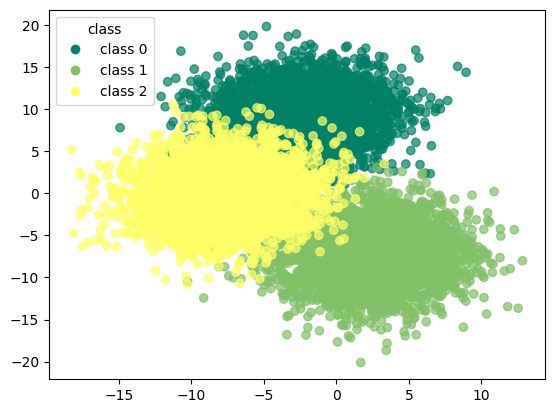

In [ ]:
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_spectral['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

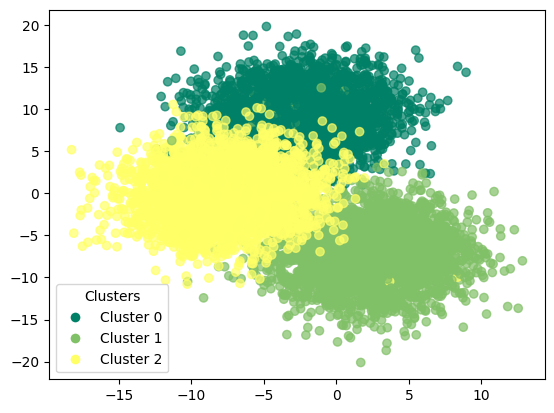

In [ ]:
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

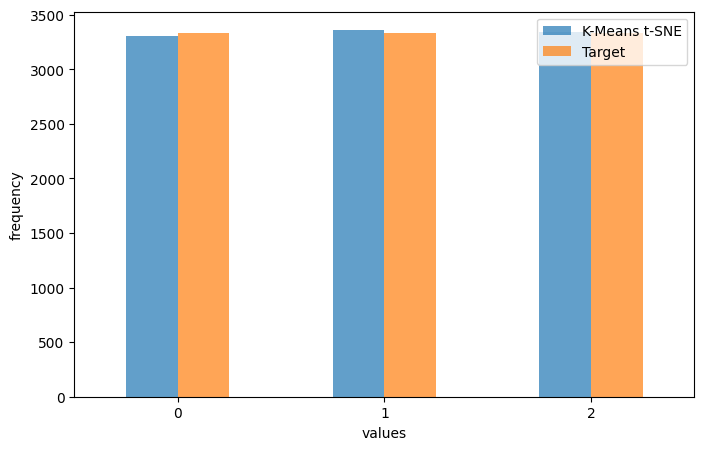

In [ ]:
counts_kmeans = df_tsne_spectral['spectral_tsne'].value_counts().sort_index()
counts_target = df_tsne_spectral['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'Spectral Clustering t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["Spectral Clustering T-sne", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [ ]:
print(confusion_matrix(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

[[3303   29    1]
 [   0 3329    4]
 [   0    1 3332]]


In [ ]:
print(classification_report(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
adjusted_rand_score(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])

0.4287245621518938

In [ ]:
normalized_mutual_info_score(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne'])

0.7692189705956035

In [ ]:
silhouette_score(df_tsne_spectral.drop(columns=['target','spectral_tsne']).values,df_tsne_spectral['spectral_tsne'])

0.41501469842079386

### spectral clustering with umap

In [ ]:
spectral_umap = SpectralClustering(n_clusters=3,affinity ='rbf')

In [ ]:
spectral_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_umap_spectral = corr_dataset.copy()

In [ ]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [ ]:
df_umap_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_umap  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
9994            1  
9995            1  
9996            1  
9997            1  
9998            1  

[9999 rows x 22 columns]

In [ ]:
y_true = df_umap_spectral['target'].values  
y_spectral = df_umap_spectral['spectral_umap'].values  

conf_matrix = confusion_matrix(y_true, y_spectral)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_spectral['spectral_umap'] = np.array([mapping[label] for label in y_spectral])

print("accuracy before:", np.mean(y_spectral == y_true))
print("accuracy after:", np.mean(df_umap_spectral['spectral_umap'] == y_true))

accuracy before: 0.0
accuracy after: 1.0


In [ ]:
df_umap_spectral

vab_1     vab_2      vab_3     vab_4     vab_5      vab_6     vab_7  \
0     -5.152004  9.124349   8.018804  2.909264 -3.593232  -7.170291 -9.392568   
1      0.776633  7.139438  -0.956529 -4.054445 -9.419401 -13.455876 -8.429588   
2     -2.706756  7.837347   6.061989  2.985600 -6.972435  -8.129626 -6.761865   
3     -1.831845  7.410481   3.966438  4.072164 -6.687061  -4.511670 -6.201272   
4     -0.190637  9.221953   6.432244  1.829044 -4.080903  -4.686219 -7.196596   
...         ...       ...        ...       ...       ...        ...       ...   
9994  -4.677455 -3.645803  -8.974268  8.842406 -1.318838   7.394712 -7.441952   
9995  -9.818894 -2.279549 -10.627805  8.467228 -5.507880   2.429212  1.343342   
9996 -15.227076 -4.736645  -8.243842  2.110539 -4.649238   1.493749 -4.114069   
9997  -5.454461  3.202938  -5.268023  7.006287 -3.409112   4.557069 -4.723157   
9998 -11.965096 -4.313297  -9.170856  5.445247 -2.972249   2.213038 -9.171032   

         vab_8     vab_9     vab_10  ...     vab_13     vab_14    vab_15  \
0     3.986254  0.732290   4.812019  ...   4.106921  -2.731575 -8.178097   
1     6.968542  1.678403   1.004490  ...   6.035455  -7.118252 -8.740804   
2     4.359043  2.322148   4.728814  ...   4.943632  -3.328174 -3.815171   
3     8.042037  2.391284   2.192819  ...   6.798002  -8.760151 -3.662339   
4     8.747315  3.658733   6.821809  ...   2.840858  -5.588362 -7.941978   
...        ...       ...        ...  ...        ...        ...       ...   
9994 -2.754346  7.863326 -11.675801  ...   7.010298   6.893327  1.987985   
9995 -3.196335 -1.992973  -8.184132  ...   5.118475  12.095014  3.449935   
9996 -0.522743  1.498673  -6.005086  ...   9.068735   8.877587 -1.682355   
9997 -2.494617  5.311604  -7.006290  ...  12.974825  14.429359 -0.016353   
9998 -0.771757 -2.048526  -8.358609  ...   7.885466   9.634825  3.893956   

         vab_16     vab_17     vab_18     vab_19    vab_20  target  \
0    -10.124234  -1.932494   0.666321   0.206354 -8.685204       0   
1    -11.896706  -2.365136  -2.325526  -2.285224 -3.609069       0   
2    -10.766150  -3.478127   0.064453   1.617425 -1.288632       0   
3     -7.989494  -3.478067   0.965423   4.407371  0.681622       0   
4     -6.003940  -3.433710  -0.171449  -0.058949 -3.605684       0   
...         ...        ...        ...        ...       ...     ...   
9994   8.618069   0.499451  -7.866530  -8.241748 -4.571805       2   
9995   1.945385  -4.387963 -11.392284  -8.420734 -2.514598       2   
9996   3.393315  -3.681439  -1.337268 -14.706864 -3.746624       2   
9997   5.918872 -12.139450  -6.083068 -13.410955 -0.592108       2   
9998   3.927486  -6.857219  -8.726228 -11.145893 -7.054914       2   

      kmeans_umap  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9994            2  
9995            2  
9996            2  
9997            2  
9998            2  

[9999 rows x 22 columns]

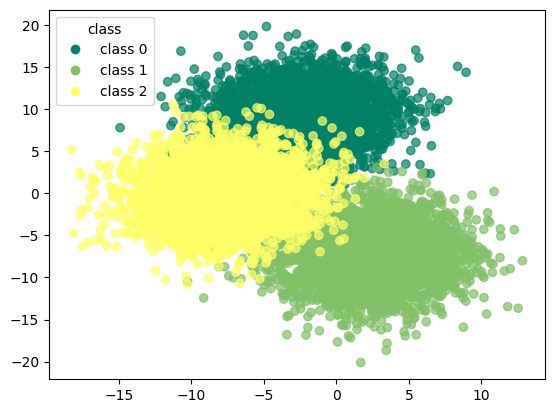

In [ ]:
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_spectral['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

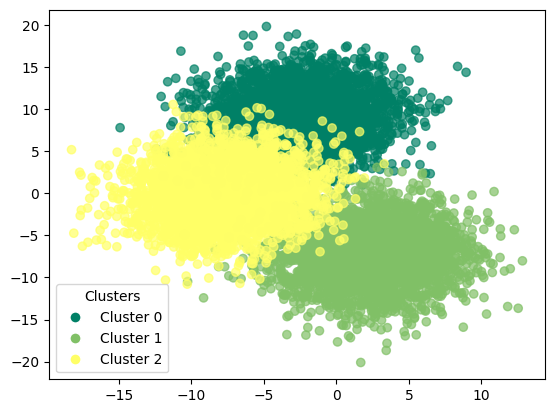

In [ ]:
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [ ]:
print(confusion_matrix(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
adjusted_rand_score(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])

0.4287245621518938

In [ ]:
normalized_mutual_info_score(df_umap_spectral['target'],df_umap_spectral['spectral_umap'])

0.7692189705956035

In [ ]:
silhouette_score(df_umap_spectral.drop(columns=['target','spectral_umap']).values,df_umap_spectral['spectral_umap'])

0.41501469842079386

# overall results k-means

## basic

In [ ]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


## + pca

In [ ]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      3333
           1       0.50      1.00      0.67      3333
           2       0.00      0.00      0.00      3333

    accuracy                           0.50      9999
   macro avg       0.50      0.50      0.45      9999
weighted avg       0.50      0.50      0.45      9999



In [ ]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[1708    0 1625]
 [   0 3333    0]
 [   0 3333    0]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

[[3303   29    1]
 [   0 3329    4]
 [   0    1 3332]]


## + UMAP

In [ ]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results trimmed k-means

## basic

In [ ]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3001
           1       1.00      1.00      1.00      2968
           2       1.00      1.00      1.00      3030

    accuracy                           1.00      8999
   macro avg       1.00      1.00      1.00      8999
weighted avg       1.00      1.00      1.00      8999



In [ ]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[3001    0    0]
 [   0 2968    0]
 [   0    0 3030]]


## + pca

In [ ]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3001
           1       0.94      0.89      0.91      2968
           2       1.00      0.95      0.97      3030

    accuracy                           0.94      8999
   macro avg       0.95      0.94      0.94      8999
weighted avg       0.95      0.94      0.94      8999



In [ ]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[3001    0    0]
 [ 331 2637    0]
 [   0  165 2865]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3001
           1       0.97      0.97      0.97      2968
           2       1.00      0.98      0.99      3030

    accuracy                           0.98      8999
   macro avg       0.98      0.98      0.98      8999
weighted avg       0.98      0.98      0.98      8999



In [ ]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

[[2973   27    1]
 [  77 2888    3]
 [   0   62 2968]]


## + UMAP

In [ ]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      1.00      1.00      3102
           2       1.00      1.00      1.00      2994

    accuracy                           1.00      8999
   macro avg       1.00      1.00      1.00      8999
weighted avg       1.00      1.00      1.00      8999



In [ ]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

[[2903    0    0]
 [   0 3102    0]
 [   0    0 2994]]


# overall results dbscan

## basic

In [ ]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    3333.0
           1       0.00      0.00      0.00    3333.0
           2       0.00      0.00      0.00    3333.0

    accuracy                           0.00    9999.0
   macro avg       0.00      0.00      0.00    9999.0
weighted avg       0.00      0.00      0.00    9999.0



In [ ]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[   0    0    0    0]
 [3333    0    0    0]
 [3333    0    0    0]
 [3333    0    0    0]]


## + pca

In [ ]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.96      0.98      3333
           1       1.00      0.95      0.98      3333
           2       1.00      0.97      0.98      3333

    accuracy                           0.96      9999
   macro avg       0.75      0.72      0.74      9999
weighted avg       1.00      0.96      0.98      9999



In [ ]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[   0    0    0    0]
 [ 118 3215    0    0]
 [ 154    0 3179    0]
 [ 108    0    0 3225]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.04      0.08      3333
           1       0.00      0.00      0.00      3333
           2       0.00      0.00      0.00      3333
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00    

In [ ]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[   0    0    0 ...    0    0    0]
 [1452  140  133 ...    0    0    0]
 [1379    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


## + UMAP

In [ ]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results GMM

## basic

In [ ]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


## + pca

In [ ]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3333
           1       0.50      1.00      0.67      3333
           2       0.00      0.00      0.00      3333

    accuracy                           0.60      9999
   macro avg       0.50      0.60      0.52      9999
weighted avg       0.50      0.60      0.52      9999



In [ ]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[2693    0  640]
 [   0 3333    0]
 [   0 3333    0]]


## + t-SNE

In [ ]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3333
           1       0.99      1.00      0.99      3333
           2       1.00      1.00      1.00      3333

    accuracy                           0.99      9999
   macro avg       0.99      0.99      0.99      9999
weighted avg       0.99      0.99      0.99      9999



In [ ]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[3282   44    7]
 [   0 3333    0]
 [   0    5 3328]]


## + UMAP

In [ ]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



In [ ]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


# overall results pam

## basic

In [ ]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + pca

In [ ]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + t-SNE

In [ ]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[3303   24    6]
 [   0 3320   13]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       0.99      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + umap

In [ ]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



# overall results spectral clustering

## basic

In [ ]:
print(confusion_matrix(df_spectral['target'],df_spectral['spectral_clustering']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_spectral['target'],df_spectral['spectral_clustering']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + pca

In [ ]:
print(confusion_matrix(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_pca_spectral['target'],df_pca_spectral['spectral_pca']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + t-SNE

In [ ]:
print(confusion_matrix(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

[[3303   24    6]
 [   0 3320   13]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_tsne_spectral['target'],df_tsne_spectral['spectral_tsne']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3333
           1       0.99      1.00      0.99      3333
           2       0.99      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



## + umap

In [ ]:
print(confusion_matrix(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

[[3333    0    0]
 [   0 3333    0]
 [   0    0 3333]]


In [ ]:
print(classification_report(df_umap_spectral['target'],df_umap_spectral['spectral_umap']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3333
           1       1.00      1.00      1.00      3333
           2       1.00      1.00      1.00      3333

    accuracy                           1.00      9999
   macro avg       1.00      1.00      1.00      9999
weighted avg       1.00      1.00      1.00      9999



# external measures - overall results 

In [ ]:
def evaluate_clustering(X, y_true, y_pred):
    
    scores = {
    "ARI": adjusted_rand_score(y_true, y_pred),
    "NMI": normalized_mutual_info_score(y_true, y_pred),
    "Silhouette": silhouette_score(X, y_pred)
    }   
    
    return scores

## k-means

In [ ]:
scores = evaluate_clustering(df_kmeans.drop(['target','k_means'],axis=1).values, df_kmeans['target'], df_kmeans['k_means'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

ARI: 0.762
NMI: 0.769
Silhouette: 0.415


## k-means + pca

In [ ]:
scores = evaluate_clustering(df_pca_kmeans.drop(['target','kmeans_pca'],axis=1).values, df_pca_kmeans['target'], df_pca_kmeans['kmeans_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

ARI: 0.515
NMI: 0.680
Silhouette: 0.161


## k-means + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_kmeans.drop(['target','kmeans_tsne'],axis=1).values, df_tsne_kmeans['target'], df_tsne_kmeans['kmeans_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## k-means + umap

In [ ]:
scores = evaluate_clustering(df_umap_kmeans.drop(['target','kmeans_umap'],axis=1).values, df_umap_kmeans['target'], df_umap_kmeans['kmeans_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

##  trimmed k-means 

In [ ]:
scores = evaluate_clustering(df_trim_kmeans.drop(['target','trim_kmeans'],axis=1).values, df_trim_kmeans['target'], df_trim_kmeans['trim_kmeans'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + pca

In [ ]:
scores = evaluate_clustering(df_pca_trim_kmeans.drop(['target','trim_kmeans_pca'],axis=1).values, df_pca_trim_kmeans['target'], df_pca_trim_kmeans['trim_kmeans_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_trim_kmeans.drop(['target','trim_kmeans_tsne'],axis=1).values, df_tsne_trim_kmeans['target'], df_tsne_trim_kmeans['trim_kmeans_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## trimmed k-means + umap

In [ ]:
scores = evaluate_clustering(df_umap_trim_kmeans.drop(['target','trim_kmeans_umap'],axis=1).values, df_umap_trim_kmeans['target'], df_umap_trim_kmeans['trim_kmeans_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan

In [ ]:
scores = evaluate_clustering(df_dbscan.drop(['target','dbscan'],axis=1).values, df_dbscan['target'], df_dbscan['dbscan'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + pca

In [ ]:
scores = evaluate_clustering(df_pca_dbscan.drop(['target','dbscan_pca'],axis=1).values, df_pca_dbscan['target'], df_pca_dbscan['dbscan_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_dbscan.drop(['target','dbscan_tsne'],axis=1).values, df_tsne_dbscan['target'], df_tsne_dbscan['dbscan_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## dbscan + umap

In [ ]:
scores = evaluate_clustering(df_umap_dbscan.drop(['target','dbscan_umap'],axis=1).values, df_umap_dbscan['target'], df_umap_dbscan['dbscan_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM

In [ ]:
scores = evaluate_clustering(df_gmm.drop(['target','gmm'],axis=1).values, df_gmm['target'], df_gmm['gmm'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + pca

In [ ]:
scores = evaluate_clustering(df_pca_gmm.drop(['target','gmm_pca'],axis=1).values, df_pca_gmm['target'], df_pca_gmm['gmm_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_gmm.drop(['target','gmm_tsne'],axis=1).values, df_tsne_gmm['target'], df_tsne_gmm['gmm_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## GMM + umap

In [ ]:
scores = evaluate_clustering(df_umap_gmm.drop(['target','gmm_umap'],axis=1).values, df_umap_gmm['target'], df_umap_gmm['gmm_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam

In [ ]:
scores = evaluate_clustering(df_pam.drop(['target','pam'],axis=1).values, df_pam['target'], df_pam['pam'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam + pca

In [ ]:
scores = evaluate_clustering(df_pam_pca.drop(['target','pam_pca'],axis=1).values, df_pam_pca['target'], df_pam_pca['pam_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pam + tsne

In [ ]:
scores = evaluate_clustering(df_pam_tsne.drop(['target','pam_tsne'],axis=1).values, df_pam_tsne['target'], df_pam_tsne['pam_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## pca + umap

In [ ]:
scores = evaluate_clustering(df_pam_umap.drop(['target','pam_umap'],axis=1).values, df_pam_umap['target'], df_pam_umap['pam_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering

In [ ]:
scores = evaluate_clustering(df_spectral.drop(['target','spectral_clustering'],axis=1).values, df_spectral['target'], df_spectral['spectral_clustering'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + pca

In [ ]:
scores = evaluate_clustering(df_pca_spectral.drop(['target','spectral_pca'],axis=1).values, df_pca_spectral['target'], df_pca_spectral['spectral_pca'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + tsne

In [ ]:
scores = evaluate_clustering(df_tsne_spectral.drop(['target','spectral_tsne'],axis=1).values, df_tsne_spectral['target'], df_tsne_spectral['spectral_tsne'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")

## spectral clustering + umap

In [ ]:
scores = evaluate_clustering(df_umap_spectral.drop(['target','spectral_umap'],axis=1).values, df_umap_spectral['target'], df_umap_spectral['spectral_umap'])

In [ ]:
for metric,value in scores.items():
    print(f"{metric}: {value:.3f}")